> **DO NOT EDIT IF INSIDE `caobd_s19` folder** 

# Assignment 3

**Handin in Peergrade**: *Wednesday*, April 3, 2019, 23:59<br>
**Peergrading deadline**: *Wednesday*, April 10, 2019, 23:59<br>
**Peergrading feedback deadline**: *Sunday*, April 13, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 7

**PRECODE**

In [3]:
import re
import nltk
import os
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfTransformer as tfidf
yvalues = []

# Get a list of stopwords from nltk
stopwords = nltk.corpus.stopwords.words("english")
characterlist = []
for faction in ["heroes", "ambiguous", "villains"]:
        for filename in os.listdir('/Users/alexsahai/bigdata/caobd_s19/data/%s' % faction):
            characterlist.append((filename, faction))
            yvalues.append(faction)
            
def capitalize(str):
    
    s = ' '.join(word[0].upper() + word[1:] for word in str.split())
    #print(s)
    return s
    
        
    

def get_clean_words(character_filename, faction):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Load her markup
    with open("/Users/alexsahai/bigdata/caobd_s19/data/%s/%s" % (faction, character_filename)) as fp:
        markup = fp.read()
 
    # Remove table and external links
    markup_text = re.sub(r'\{\{[\s\S]*?\}\}', '', markup)
    
    # Remove category links
    markup_text = re.sub(r'\[\[Category.+\]\]', '', markup_text)

    markup_text = markup_text.replace(capitalize(character_filename[0:-4]), " ")
    
    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in re.findall('\w+', markup_text) if w.lower() not in stopwords]
    
    # Remove numbers
    words = [w for w in words if not _isnum(w)]
    
    return words

# Example
print(get_clean_words("Iron man.txt", "heroes"))

['anthony', 'edward', 'tony', 'stark', 'fictional', 'superhero', 'appearing', 'american', 'comic', 'book', 'published', 'marvel', 'comics', 'character', 'co', 'created', 'writer', 'editor', 'stan', 'lee', 'developed', 'scripter', 'larry', 'lieber', 'designed', 'artists', 'heck', 'jack', 'kirby', 'character', 'made', 'first', 'appearance', 'tales', 'suspense', 'cover', 'date', 'march', 'received', 'title', 'comic', 'book', 'may', 'wealthy', 'american', 'business', 'magnate', 'playboy', 'lifestyle', 'playboy', 'ingenious', 'scientist', 'anthony', 'edward', 'tony', 'stark', 'suffers', 'severe', 'chest', 'injury', 'kidnapping', 'captors', 'attempt', 'force', 'build', 'weapon', 'mass', 'destruction', 'instead', 'creates', 'armor', 'powered', 'suit', 'armor', 'save', 'life', 'escape', 'captivity', 'later', 'stark', 'develops', 'suit', 'adding', 'weapons', 'technological', 'devices', 'designed', 'company', 'stark', 'industries', 'uses', 'suit', 'successive', 'versions', 'protect', 'world', 'a

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexsahai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


>**Ex. 7.2.1**: For each of the three character classes, compute the sentiment scores across wikipedia articles so that you can produce three histograms (one for each class) with sentiment scores. You can use the text strings you generated in the previous exercise. We will cheat a bit and use a library that does the scoring for us. Install `afinn` using `conda` or `pip` and extract the sentiment with that module. There's an example of how to use it on the library's [PyPi repository](https://pypi.python.org/pypi/afinn).

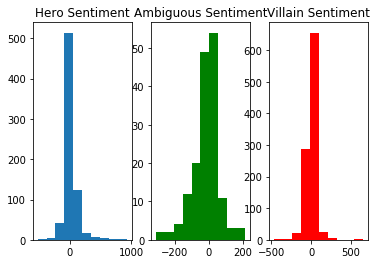

In [4]:
# RUN THIS TWICE TO GET PLOTS !!!

from afinn import Afinn
import matplotlib.pyplot as plt
import os
from collections import Counter
import numpy as np
from collections import defaultdict

afinn = Afinn()


character_text = []

heroscore = []
ambigscore = []
villainscore = []
allwords = []
chardict = defaultdict(list)
i = 0
for filename, faction in characterlist:
    text = get_clean_words(filename, faction)
    for word in text:
        allwords.append(word) #contains every word in corpus, repeats included
    temp_list = []
    temp_list.append(filename[:-4])
    temp_list.append(faction)
    temp_list.append(text)

    
    character_text.append(temp_list)
    
    
    
    if faction == "heroes":
        heroscore.append(afinn.score(str(text)))
    if faction == "ambiguous":
        ambigscore.append(afinn.score(str(text)))
    if faction == "villains":
        villainscore.append(afinn.score(str(text)))
            
fig, ax = plt.subplots(1,3)
ax[0].hist(heroscore)
ax[0].set_title("Hero Sentiment")
ax[1].hist(ambigscore, color = "g")
ax[1].set_title("Ambiguous Sentiment")
ax[2].hist(villainscore, color = "r")
ax[2].set_title("Villain Sentiment")


    

uniquewords = set(allwords) #set of all words (eliminates repeats)


plt.show()

# 7.4.1 SETUP!!!!!!!!!

In [3]:
i = 0
bagofwords = []
target = []
hercharwordcount = [] #word count for each hero
vilcharwordcount = [] #word count for each vil
ambigcharwordcount = [] #word count for each ambig
character_text.sort()
uniquewords = np.array([j for j in uniquewords])
print(len(uniquewords))
numdocs = np.zeros(len(uniquewords)) #this array will contain every word, 
#and the corresponding # of docs that contain it




counter = 0
for name, faction, text in character_text:
    
    chardict[name].append(counter)
    counter += 1
    cnt = Counter()    
    wordcounter = 0 #counts number of words in a given document
    for word in text:
        cnt[word] += 1
        wordcounter += 1
    if faction == "heroes":
        target.append(1)
        hercharwordcount.append((wordcounter,name)) #tuple list that contains word count, name of hero
    elif faction == "villains":
        target.append(0)
        vilcharwordcount.append((wordcounter,name)) #tuple list that contains word count, name of villain
    else:
        target.append(2)
        ambigcharwordcount.append((wordcounter,name)) #tuple list that contains word count, name of ambig

        
    for i in range(len(uniquewords)):
        num = 0
        num = cnt[uniquewords[i]]

        if num != 0: 
            numdocs[i] = numdocs[i] + 1 #keeps track of how many documents contain a given word,
            #to be used later in TF IDF calculation

        

print(len(uniquewords))

        

48090
48090


In [4]:
i = 0

while i<len(numdocs):
    print(i, "I")
    print(len(numdocs),"length")
    if numdocs[i] == 1:
        numdocs = np.delete(numdocs, i)
        uniquewords = np.delete(uniquewords,i)
    else:
        i+=1
        
print(len(uniquewords))

0 I
48090 length
0 I
48089 length
1 I
48089 length
2 I
48089 length
3 I
48089 length
3 I
48088 length
4 I
48088 length
5 I
48088 length
5 I
48087 length
6 I
48087 length
6 I
48086 length
7 I
48086 length
8 I
48086 length
8 I
48085 length
8 I
48084 length
9 I
48084 length
10 I
48084 length
10 I
48083 length
11 I
48083 length
12 I
48083 length
13 I
48083 length
13 I
48082 length
14 I
48082 length
14 I
48081 length
15 I
48081 length
15 I
48080 length
16 I
48080 length
17 I
48080 length
18 I
48080 length
19 I
48080 length
19 I
48079 length
20 I
48079 length
21 I
48079 length
22 I
48079 length
22 I
48078 length
22 I
48077 length
23 I
48077 length
23 I
48076 length
24 I
48076 length
25 I
48076 length
26 I
48076 length
27 I
48076 length
27 I
48075 length
28 I
48075 length
29 I
48075 length
30 I
48075 length
30 I
48074 length
31 I
48074 length
31 I
48073 length
32 I
48073 length
32 I
48072 length
33 I
48072 length
34 I
48072 length
35 I
48072 length
36 I
48072 length
37 I
48072 length
38 I
480

264 I
47895 length
265 I
47895 length
265 I
47894 length
266 I
47894 length
267 I
47894 length
268 I
47894 length
269 I
47894 length
270 I
47894 length
271 I
47894 length
271 I
47893 length
272 I
47893 length
273 I
47893 length
273 I
47892 length
273 I
47891 length
274 I
47891 length
275 I
47891 length
275 I
47890 length
276 I
47890 length
277 I
47890 length
277 I
47889 length
278 I
47889 length
279 I
47889 length
279 I
47888 length
280 I
47888 length
281 I
47888 length
282 I
47888 length
282 I
47887 length
283 I
47887 length
284 I
47887 length
285 I
47887 length
286 I
47887 length
287 I
47887 length
288 I
47887 length
288 I
47886 length
288 I
47885 length
288 I
47884 length
289 I
47884 length
290 I
47884 length
290 I
47883 length
290 I
47882 length
290 I
47881 length
290 I
47880 length
290 I
47879 length
291 I
47879 length
291 I
47878 length
292 I
47878 length
292 I
47877 length
293 I
47877 length
294 I
47877 length
295 I
47877 length
296 I
47877 length
297 I
47877 length
298 I
47877 

548 I
47723 length
549 I
47723 length
550 I
47723 length
551 I
47723 length
552 I
47723 length
552 I
47722 length
553 I
47722 length
553 I
47721 length
554 I
47721 length
555 I
47721 length
555 I
47720 length
556 I
47720 length
557 I
47720 length
558 I
47720 length
559 I
47720 length
559 I
47719 length
559 I
47718 length
559 I
47717 length
559 I
47716 length
559 I
47715 length
560 I
47715 length
561 I
47715 length
562 I
47715 length
562 I
47714 length
562 I
47713 length
563 I
47713 length
564 I
47713 length
564 I
47712 length
565 I
47712 length
565 I
47711 length
565 I
47710 length
565 I
47709 length
565 I
47708 length
565 I
47707 length
566 I
47707 length
566 I
47706 length
566 I
47705 length
567 I
47705 length
567 I
47704 length
568 I
47704 length
568 I
47703 length
568 I
47702 length
569 I
47702 length
569 I
47701 length
570 I
47701 length
570 I
47700 length
571 I
47700 length
572 I
47700 length
573 I
47700 length
573 I
47699 length
574 I
47699 length
574 I
47698 length
575 I
47698 

789 I
47521 length
789 I
47520 length
790 I
47520 length
791 I
47520 length
791 I
47519 length
792 I
47519 length
793 I
47519 length
794 I
47519 length
794 I
47518 length
795 I
47518 length
795 I
47517 length
796 I
47517 length
797 I
47517 length
797 I
47516 length
797 I
47515 length
797 I
47514 length
797 I
47513 length
797 I
47512 length
797 I
47511 length
797 I
47510 length
798 I
47510 length
798 I
47509 length
798 I
47508 length
799 I
47508 length
800 I
47508 length
801 I
47508 length
801 I
47507 length
802 I
47507 length
803 I
47507 length
803 I
47506 length
803 I
47505 length
804 I
47505 length
804 I
47504 length
804 I
47503 length
805 I
47503 length
805 I
47502 length
806 I
47502 length
807 I
47502 length
808 I
47502 length
808 I
47501 length
808 I
47500 length
808 I
47499 length
808 I
47498 length
809 I
47498 length
809 I
47497 length
809 I
47496 length
809 I
47495 length
810 I
47495 length
811 I
47495 length
811 I
47494 length
811 I
47493 length
812 I
47493 length
813 I
47493 

1044 I
47325 length
1045 I
47325 length
1045 I
47324 length
1046 I
47324 length
1047 I
47324 length
1048 I
47324 length
1048 I
47323 length
1049 I
47323 length
1050 I
47323 length
1050 I
47322 length
1050 I
47321 length
1051 I
47321 length
1052 I
47321 length
1052 I
47320 length
1053 I
47320 length
1054 I
47320 length
1055 I
47320 length
1055 I
47319 length
1055 I
47318 length
1056 I
47318 length
1057 I
47318 length
1057 I
47317 length
1057 I
47316 length
1057 I
47315 length
1057 I
47314 length
1058 I
47314 length
1059 I
47314 length
1059 I
47313 length
1059 I
47312 length
1060 I
47312 length
1060 I
47311 length
1060 I
47310 length
1061 I
47310 length
1061 I
47309 length
1061 I
47308 length
1062 I
47308 length
1063 I
47308 length
1063 I
47307 length
1064 I
47307 length
1065 I
47307 length
1065 I
47306 length
1066 I
47306 length
1067 I
47306 length
1068 I
47306 length
1069 I
47306 length
1070 I
47306 length
1070 I
47305 length
1071 I
47305 length
1071 I
47304 length
1071 I
47303 length


1287 I
47133 length
1288 I
47133 length
1289 I
47133 length
1289 I
47132 length
1290 I
47132 length
1291 I
47132 length
1291 I
47131 length
1291 I
47130 length
1291 I
47129 length
1291 I
47128 length
1291 I
47127 length
1291 I
47126 length
1292 I
47126 length
1292 I
47125 length
1293 I
47125 length
1294 I
47125 length
1295 I
47125 length
1295 I
47124 length
1295 I
47123 length
1295 I
47122 length
1295 I
47121 length
1296 I
47121 length
1297 I
47121 length
1298 I
47121 length
1299 I
47121 length
1299 I
47120 length
1299 I
47119 length
1300 I
47119 length
1301 I
47119 length
1302 I
47119 length
1302 I
47118 length
1303 I
47118 length
1304 I
47118 length
1305 I
47118 length
1306 I
47118 length
1306 I
47117 length
1306 I
47116 length
1307 I
47116 length
1308 I
47116 length
1308 I
47115 length
1308 I
47114 length
1309 I
47114 length
1309 I
47113 length
1310 I
47113 length
1310 I
47112 length
1311 I
47112 length
1312 I
47112 length
1312 I
47111 length
1312 I
47110 length
1313 I
47110 length


1538 I
46950 length
1538 I
46949 length
1538 I
46948 length
1539 I
46948 length
1540 I
46948 length
1540 I
46947 length
1541 I
46947 length
1541 I
46946 length
1542 I
46946 length
1542 I
46945 length
1543 I
46945 length
1543 I
46944 length
1543 I
46943 length
1544 I
46943 length
1545 I
46943 length
1546 I
46943 length
1547 I
46943 length
1547 I
46942 length
1548 I
46942 length
1548 I
46941 length
1549 I
46941 length
1550 I
46941 length
1551 I
46941 length
1552 I
46941 length
1552 I
46940 length
1552 I
46939 length
1553 I
46939 length
1554 I
46939 length
1554 I
46938 length
1555 I
46938 length
1556 I
46938 length
1557 I
46938 length
1558 I
46938 length
1558 I
46937 length
1559 I
46937 length
1559 I
46936 length
1560 I
46936 length
1560 I
46935 length
1561 I
46935 length
1561 I
46934 length
1561 I
46933 length
1561 I
46932 length
1561 I
46931 length
1562 I
46931 length
1562 I
46930 length
1562 I
46929 length
1563 I
46929 length
1564 I
46929 length
1565 I
46929 length
1566 I
46929 length


1783 I
46769 length
1783 I
46768 length
1784 I
46768 length
1784 I
46767 length
1785 I
46767 length
1785 I
46766 length
1786 I
46766 length
1786 I
46765 length
1787 I
46765 length
1788 I
46765 length
1788 I
46764 length
1788 I
46763 length
1789 I
46763 length
1790 I
46763 length
1791 I
46763 length
1792 I
46763 length
1792 I
46762 length
1792 I
46761 length
1793 I
46761 length
1794 I
46761 length
1794 I
46760 length
1794 I
46759 length
1794 I
46758 length
1794 I
46757 length
1795 I
46757 length
1796 I
46757 length
1797 I
46757 length
1798 I
46757 length
1799 I
46757 length
1799 I
46756 length
1800 I
46756 length
1801 I
46756 length
1801 I
46755 length
1802 I
46755 length
1802 I
46754 length
1803 I
46754 length
1804 I
46754 length
1804 I
46753 length
1804 I
46752 length
1804 I
46751 length
1804 I
46750 length
1805 I
46750 length
1805 I
46749 length
1806 I
46749 length
1806 I
46748 length
1807 I
46748 length
1807 I
46747 length
1808 I
46747 length
1809 I
46747 length
1810 I
46747 length


2038 I
46587 length
2039 I
46587 length
2039 I
46586 length
2039 I
46585 length
2040 I
46585 length
2041 I
46585 length
2041 I
46584 length
2041 I
46583 length
2042 I
46583 length
2043 I
46583 length
2044 I
46583 length
2045 I
46583 length
2046 I
46583 length
2046 I
46582 length
2047 I
46582 length
2048 I
46582 length
2048 I
46581 length
2049 I
46581 length
2049 I
46580 length
2049 I
46579 length
2050 I
46579 length
2051 I
46579 length
2051 I
46578 length
2052 I
46578 length
2052 I
46577 length
2052 I
46576 length
2053 I
46576 length
2053 I
46575 length
2054 I
46575 length
2055 I
46575 length
2056 I
46575 length
2057 I
46575 length
2057 I
46574 length
2058 I
46574 length
2058 I
46573 length
2058 I
46572 length
2058 I
46571 length
2059 I
46571 length
2059 I
46570 length
2059 I
46569 length
2059 I
46568 length
2060 I
46568 length
2060 I
46567 length
2060 I
46566 length
2061 I
46566 length
2062 I
46566 length
2063 I
46566 length
2064 I
46566 length
2064 I
46565 length
2065 I
46565 length


2279 I
46404 length
2279 I
46403 length
2280 I
46403 length
2280 I
46402 length
2280 I
46401 length
2280 I
46400 length
2281 I
46400 length
2282 I
46400 length
2283 I
46400 length
2284 I
46400 length
2284 I
46399 length
2284 I
46398 length
2285 I
46398 length
2285 I
46397 length
2285 I
46396 length
2286 I
46396 length
2286 I
46395 length
2286 I
46394 length
2287 I
46394 length
2288 I
46394 length
2289 I
46394 length
2290 I
46394 length
2290 I
46393 length
2290 I
46392 length
2291 I
46392 length
2292 I
46392 length
2293 I
46392 length
2294 I
46392 length
2295 I
46392 length
2296 I
46392 length
2296 I
46391 length
2297 I
46391 length
2298 I
46391 length
2299 I
46391 length
2300 I
46391 length
2301 I
46391 length
2302 I
46391 length
2302 I
46390 length
2302 I
46389 length
2302 I
46388 length
2303 I
46388 length
2304 I
46388 length
2305 I
46388 length
2306 I
46388 length
2306 I
46387 length
2307 I
46387 length
2307 I
46386 length
2308 I
46386 length
2309 I
46386 length
2310 I
46386 length


2529 I
46240 length
2529 I
46239 length
2530 I
46239 length
2531 I
46239 length
2531 I
46238 length
2532 I
46238 length
2533 I
46238 length
2534 I
46238 length
2534 I
46237 length
2534 I
46236 length
2534 I
46235 length
2534 I
46234 length
2535 I
46234 length
2535 I
46233 length
2536 I
46233 length
2537 I
46233 length
2538 I
46233 length
2539 I
46233 length
2539 I
46232 length
2539 I
46231 length
2540 I
46231 length
2540 I
46230 length
2540 I
46229 length
2541 I
46229 length
2542 I
46229 length
2542 I
46228 length
2543 I
46228 length
2543 I
46227 length
2544 I
46227 length
2545 I
46227 length
2545 I
46226 length
2546 I
46226 length
2546 I
46225 length
2546 I
46224 length
2547 I
46224 length
2548 I
46224 length
2549 I
46224 length
2550 I
46224 length
2550 I
46223 length
2551 I
46223 length
2552 I
46223 length
2553 I
46223 length
2553 I
46222 length
2554 I
46222 length
2555 I
46222 length
2556 I
46222 length
2557 I
46222 length
2557 I
46221 length
2557 I
46220 length
2558 I
46220 length


2768 I
46048 length
2768 I
46047 length
2768 I
46046 length
2769 I
46046 length
2770 I
46046 length
2771 I
46046 length
2771 I
46045 length
2772 I
46045 length
2773 I
46045 length
2774 I
46045 length
2774 I
46044 length
2775 I
46044 length
2776 I
46044 length
2776 I
46043 length
2776 I
46042 length
2777 I
46042 length
2778 I
46042 length
2779 I
46042 length
2780 I
46042 length
2780 I
46041 length
2780 I
46040 length
2781 I
46040 length
2781 I
46039 length
2781 I
46038 length
2782 I
46038 length
2783 I
46038 length
2784 I
46038 length
2785 I
46038 length
2786 I
46038 length
2787 I
46038 length
2787 I
46037 length
2788 I
46037 length
2789 I
46037 length
2790 I
46037 length
2791 I
46037 length
2792 I
46037 length
2793 I
46037 length
2794 I
46037 length
2794 I
46036 length
2794 I
46035 length
2795 I
46035 length
2796 I
46035 length
2797 I
46035 length
2798 I
46035 length
2799 I
46035 length
2800 I
46035 length
2800 I
46034 length
2801 I
46034 length
2802 I
46034 length
2803 I
46034 length


3014 I
45864 length
3014 I
45863 length
3015 I
45863 length
3016 I
45863 length
3017 I
45863 length
3018 I
45863 length
3019 I
45863 length
3019 I
45862 length
3020 I
45862 length
3021 I
45862 length
3021 I
45861 length
3021 I
45860 length
3021 I
45859 length
3022 I
45859 length
3022 I
45858 length
3022 I
45857 length
3023 I
45857 length
3023 I
45856 length
3024 I
45856 length
3025 I
45856 length
3025 I
45855 length
3026 I
45855 length
3027 I
45855 length
3028 I
45855 length
3029 I
45855 length
3030 I
45855 length
3030 I
45854 length
3030 I
45853 length
3031 I
45853 length
3032 I
45853 length
3032 I
45852 length
3032 I
45851 length
3032 I
45850 length
3033 I
45850 length
3034 I
45850 length
3034 I
45849 length
3034 I
45848 length
3035 I
45848 length
3036 I
45848 length
3037 I
45848 length
3037 I
45847 length
3038 I
45847 length
3039 I
45847 length
3040 I
45847 length
3041 I
45847 length
3041 I
45846 length
3042 I
45846 length
3042 I
45845 length
3042 I
45844 length
3043 I
45844 length


3267 I
45701 length
3267 I
45700 length
3268 I
45700 length
3268 I
45699 length
3269 I
45699 length
3270 I
45699 length
3271 I
45699 length
3272 I
45699 length
3273 I
45699 length
3274 I
45699 length
3274 I
45698 length
3275 I
45698 length
3276 I
45698 length
3277 I
45698 length
3278 I
45698 length
3279 I
45698 length
3279 I
45697 length
3279 I
45696 length
3280 I
45696 length
3280 I
45695 length
3281 I
45695 length
3281 I
45694 length
3281 I
45693 length
3282 I
45693 length
3283 I
45693 length
3283 I
45692 length
3284 I
45692 length
3285 I
45692 length
3286 I
45692 length
3287 I
45692 length
3287 I
45691 length
3287 I
45690 length
3287 I
45689 length
3288 I
45689 length
3289 I
45689 length
3290 I
45689 length
3291 I
45689 length
3292 I
45689 length
3293 I
45689 length
3294 I
45689 length
3295 I
45689 length
3296 I
45689 length
3297 I
45689 length
3298 I
45689 length
3299 I
45689 length
3300 I
45689 length
3300 I
45688 length
3301 I
45688 length
3301 I
45687 length
3302 I
45687 length


3511 I
45529 length
3511 I
45528 length
3512 I
45528 length
3513 I
45528 length
3514 I
45528 length
3514 I
45527 length
3514 I
45526 length
3515 I
45526 length
3516 I
45526 length
3516 I
45525 length
3517 I
45525 length
3518 I
45525 length
3519 I
45525 length
3520 I
45525 length
3521 I
45525 length
3521 I
45524 length
3522 I
45524 length
3523 I
45524 length
3524 I
45524 length
3524 I
45523 length
3525 I
45523 length
3525 I
45522 length
3526 I
45522 length
3526 I
45521 length
3526 I
45520 length
3527 I
45520 length
3528 I
45520 length
3529 I
45520 length
3530 I
45520 length
3531 I
45520 length
3531 I
45519 length
3531 I
45518 length
3531 I
45517 length
3532 I
45517 length
3533 I
45517 length
3534 I
45517 length
3535 I
45517 length
3536 I
45517 length
3536 I
45516 length
3536 I
45515 length
3536 I
45514 length
3537 I
45514 length
3538 I
45514 length
3539 I
45514 length
3539 I
45513 length
3540 I
45513 length
3540 I
45512 length
3541 I
45512 length
3542 I
45512 length
3543 I
45512 length


3777 I
45377 length
3778 I
45377 length
3779 I
45377 length
3780 I
45377 length
3781 I
45377 length
3781 I
45376 length
3782 I
45376 length
3782 I
45375 length
3783 I
45375 length
3784 I
45375 length
3785 I
45375 length
3786 I
45375 length
3787 I
45375 length
3787 I
45374 length
3787 I
45373 length
3788 I
45373 length
3789 I
45373 length
3790 I
45373 length
3791 I
45373 length
3792 I
45373 length
3793 I
45373 length
3794 I
45373 length
3795 I
45373 length
3795 I
45372 length
3796 I
45372 length
3796 I
45371 length
3797 I
45371 length
3798 I
45371 length
3798 I
45370 length
3798 I
45369 length
3798 I
45368 length
3798 I
45367 length
3799 I
45367 length
3799 I
45366 length
3800 I
45366 length
3800 I
45365 length
3801 I
45365 length
3802 I
45365 length
3803 I
45365 length
3804 I
45365 length
3804 I
45364 length
3805 I
45364 length
3805 I
45363 length
3805 I
45362 length
3805 I
45361 length
3805 I
45360 length
3805 I
45359 length
3806 I
45359 length
3807 I
45359 length
3807 I
45358 length


4029 I
45200 length
4029 I
45199 length
4030 I
45199 length
4030 I
45198 length
4030 I
45197 length
4030 I
45196 length
4030 I
45195 length
4031 I
45195 length
4032 I
45195 length
4032 I
45194 length
4032 I
45193 length
4033 I
45193 length
4033 I
45192 length
4033 I
45191 length
4033 I
45190 length
4034 I
45190 length
4034 I
45189 length
4035 I
45189 length
4036 I
45189 length
4037 I
45189 length
4038 I
45189 length
4038 I
45188 length
4038 I
45187 length
4039 I
45187 length
4039 I
45186 length
4040 I
45186 length
4040 I
45185 length
4041 I
45185 length
4041 I
45184 length
4042 I
45184 length
4042 I
45183 length
4042 I
45182 length
4043 I
45182 length
4044 I
45182 length
4044 I
45181 length
4044 I
45180 length
4044 I
45179 length
4045 I
45179 length
4046 I
45179 length
4047 I
45179 length
4047 I
45178 length
4047 I
45177 length
4047 I
45176 length
4048 I
45176 length
4049 I
45176 length
4049 I
45175 length
4049 I
45174 length
4050 I
45174 length
4050 I
45173 length
4051 I
45173 length


4283 I
45027 length
4283 I
45026 length
4283 I
45025 length
4283 I
45024 length
4283 I
45023 length
4284 I
45023 length
4284 I
45022 length
4285 I
45022 length
4285 I
45021 length
4286 I
45021 length
4287 I
45021 length
4288 I
45021 length
4288 I
45020 length
4289 I
45020 length
4290 I
45020 length
4291 I
45020 length
4292 I
45020 length
4293 I
45020 length
4294 I
45020 length
4294 I
45019 length
4294 I
45018 length
4294 I
45017 length
4295 I
45017 length
4296 I
45017 length
4297 I
45017 length
4298 I
45017 length
4298 I
45016 length
4299 I
45016 length
4299 I
45015 length
4300 I
45015 length
4301 I
45015 length
4301 I
45014 length
4302 I
45014 length
4303 I
45014 length
4304 I
45014 length
4304 I
45013 length
4304 I
45012 length
4304 I
45011 length
4305 I
45011 length
4305 I
45010 length
4305 I
45009 length
4305 I
45008 length
4306 I
45008 length
4306 I
45007 length
4307 I
45007 length
4307 I
45006 length
4307 I
45005 length
4308 I
45005 length
4309 I
45005 length
4310 I
45005 length


4547 I
44861 length
4547 I
44860 length
4548 I
44860 length
4548 I
44859 length
4549 I
44859 length
4550 I
44859 length
4551 I
44859 length
4551 I
44858 length
4552 I
44858 length
4552 I
44857 length
4553 I
44857 length
4554 I
44857 length
4555 I
44857 length
4556 I
44857 length
4557 I
44857 length
4557 I
44856 length
4558 I
44856 length
4559 I
44856 length
4560 I
44856 length
4560 I
44855 length
4561 I
44855 length
4561 I
44854 length
4561 I
44853 length
4562 I
44853 length
4562 I
44852 length
4562 I
44851 length
4563 I
44851 length
4563 I
44850 length
4564 I
44850 length
4564 I
44849 length
4565 I
44849 length
4566 I
44849 length
4567 I
44849 length
4568 I
44849 length
4569 I
44849 length
4570 I
44849 length
4570 I
44848 length
4571 I
44848 length
4572 I
44848 length
4572 I
44847 length
4572 I
44846 length
4573 I
44846 length
4573 I
44845 length
4574 I
44845 length
4575 I
44845 length
4576 I
44845 length
4577 I
44845 length
4578 I
44845 length
4578 I
44844 length
4579 I
44844 length


4791 I
44692 length
4791 I
44691 length
4792 I
44691 length
4793 I
44691 length
4793 I
44690 length
4794 I
44690 length
4795 I
44690 length
4796 I
44690 length
4797 I
44690 length
4797 I
44689 length
4798 I
44689 length
4799 I
44689 length
4799 I
44688 length
4800 I
44688 length
4801 I
44688 length
4802 I
44688 length
4803 I
44688 length
4804 I
44688 length
4804 I
44687 length
4805 I
44687 length
4805 I
44686 length
4806 I
44686 length
4807 I
44686 length
4807 I
44685 length
4807 I
44684 length
4808 I
44684 length
4808 I
44683 length
4809 I
44683 length
4809 I
44682 length
4810 I
44682 length
4810 I
44681 length
4811 I
44681 length
4812 I
44681 length
4813 I
44681 length
4814 I
44681 length
4815 I
44681 length
4816 I
44681 length
4816 I
44680 length
4817 I
44680 length
4818 I
44680 length
4818 I
44679 length
4819 I
44679 length
4819 I
44678 length
4819 I
44677 length
4820 I
44677 length
4821 I
44677 length
4822 I
44677 length
4822 I
44676 length
4823 I
44676 length
4824 I
44676 length


5040 I
44519 length
5041 I
44519 length
5042 I
44519 length
5043 I
44519 length
5043 I
44518 length
5044 I
44518 length
5045 I
44518 length
5046 I
44518 length
5046 I
44517 length
5047 I
44517 length
5048 I
44517 length
5049 I
44517 length
5050 I
44517 length
5050 I
44516 length
5051 I
44516 length
5052 I
44516 length
5052 I
44515 length
5053 I
44515 length
5054 I
44515 length
5055 I
44515 length
5056 I
44515 length
5056 I
44514 length
5056 I
44513 length
5057 I
44513 length
5058 I
44513 length
5058 I
44512 length
5059 I
44512 length
5059 I
44511 length
5060 I
44511 length
5060 I
44510 length
5060 I
44509 length
5061 I
44509 length
5062 I
44509 length
5062 I
44508 length
5062 I
44507 length
5062 I
44506 length
5063 I
44506 length
5063 I
44505 length
5063 I
44504 length
5063 I
44503 length
5064 I
44503 length
5065 I
44503 length
5066 I
44503 length
5066 I
44502 length
5067 I
44502 length
5067 I
44501 length
5067 I
44500 length
5068 I
44500 length
5068 I
44499 length
5069 I
44499 length


5315 I
44349 length
5316 I
44349 length
5316 I
44348 length
5316 I
44347 length
5316 I
44346 length
5317 I
44346 length
5318 I
44346 length
5319 I
44346 length
5320 I
44346 length
5321 I
44346 length
5322 I
44346 length
5323 I
44346 length
5323 I
44345 length
5324 I
44345 length
5324 I
44344 length
5324 I
44343 length
5325 I
44343 length
5326 I
44343 length
5326 I
44342 length
5327 I
44342 length
5328 I
44342 length
5329 I
44342 length
5329 I
44341 length
5330 I
44341 length
5330 I
44340 length
5331 I
44340 length
5331 I
44339 length
5331 I
44338 length
5332 I
44338 length
5333 I
44338 length
5333 I
44337 length
5333 I
44336 length
5333 I
44335 length
5334 I
44335 length
5335 I
44335 length
5336 I
44335 length
5336 I
44334 length
5337 I
44334 length
5338 I
44334 length
5339 I
44334 length
5340 I
44334 length
5341 I
44334 length
5342 I
44334 length
5342 I
44333 length
5343 I
44333 length
5344 I
44333 length
5345 I
44333 length
5346 I
44333 length
5347 I
44333 length
5347 I
44332 length


5580 I
44181 length
5580 I
44180 length
5580 I
44179 length
5580 I
44178 length
5580 I
44177 length
5580 I
44176 length
5581 I
44176 length
5582 I
44176 length
5583 I
44176 length
5583 I
44175 length
5583 I
44174 length
5584 I
44174 length
5585 I
44174 length
5585 I
44173 length
5585 I
44172 length
5585 I
44171 length
5586 I
44171 length
5587 I
44171 length
5588 I
44171 length
5589 I
44171 length
5589 I
44170 length
5589 I
44169 length
5589 I
44168 length
5589 I
44167 length
5589 I
44166 length
5590 I
44166 length
5591 I
44166 length
5591 I
44165 length
5592 I
44165 length
5592 I
44164 length
5592 I
44163 length
5592 I
44162 length
5592 I
44161 length
5592 I
44160 length
5593 I
44160 length
5594 I
44160 length
5595 I
44160 length
5596 I
44160 length
5597 I
44160 length
5598 I
44160 length
5598 I
44159 length
5599 I
44159 length
5599 I
44158 length
5600 I
44158 length
5601 I
44158 length
5602 I
44158 length
5602 I
44157 length
5602 I
44156 length
5603 I
44156 length
5604 I
44156 length


5807 I
43995 length
5808 I
43995 length
5809 I
43995 length
5809 I
43994 length
5810 I
43994 length
5811 I
43994 length
5812 I
43994 length
5813 I
43994 length
5814 I
43994 length
5815 I
43994 length
5816 I
43994 length
5817 I
43994 length
5818 I
43994 length
5819 I
43994 length
5819 I
43993 length
5820 I
43993 length
5820 I
43992 length
5821 I
43992 length
5822 I
43992 length
5822 I
43991 length
5822 I
43990 length
5823 I
43990 length
5823 I
43989 length
5823 I
43988 length
5823 I
43987 length
5823 I
43986 length
5823 I
43985 length
5824 I
43985 length
5825 I
43985 length
5826 I
43985 length
5827 I
43985 length
5827 I
43984 length
5827 I
43983 length
5828 I
43983 length
5829 I
43983 length
5830 I
43983 length
5830 I
43982 length
5830 I
43981 length
5831 I
43981 length
5831 I
43980 length
5831 I
43979 length
5831 I
43978 length
5832 I
43978 length
5833 I
43978 length
5834 I
43978 length
5835 I
43978 length
5835 I
43977 length
5835 I
43976 length
5836 I
43976 length
5837 I
43976 length


6052 I
43827 length
6052 I
43826 length
6053 I
43826 length
6054 I
43826 length
6055 I
43826 length
6056 I
43826 length
6057 I
43826 length
6058 I
43826 length
6058 I
43825 length
6058 I
43824 length
6059 I
43824 length
6059 I
43823 length
6060 I
43823 length
6061 I
43823 length
6062 I
43823 length
6062 I
43822 length
6063 I
43822 length
6064 I
43822 length
6065 I
43822 length
6066 I
43822 length
6066 I
43821 length
6066 I
43820 length
6066 I
43819 length
6067 I
43819 length
6067 I
43818 length
6068 I
43818 length
6069 I
43818 length
6070 I
43818 length
6071 I
43818 length
6072 I
43818 length
6073 I
43818 length
6073 I
43817 length
6074 I
43817 length
6075 I
43817 length
6076 I
43817 length
6076 I
43816 length
6076 I
43815 length
6077 I
43815 length
6078 I
43815 length
6078 I
43814 length
6079 I
43814 length
6080 I
43814 length
6081 I
43814 length
6082 I
43814 length
6082 I
43813 length
6082 I
43812 length
6083 I
43812 length
6083 I
43811 length
6084 I
43811 length
6085 I
43811 length


6308 I
43665 length
6308 I
43664 length
6309 I
43664 length
6309 I
43663 length
6310 I
43663 length
6310 I
43662 length
6311 I
43662 length
6312 I
43662 length
6313 I
43662 length
6314 I
43662 length
6314 I
43661 length
6314 I
43660 length
6315 I
43660 length
6316 I
43660 length
6316 I
43659 length
6317 I
43659 length
6318 I
43659 length
6319 I
43659 length
6320 I
43659 length
6321 I
43659 length
6321 I
43658 length
6322 I
43658 length
6322 I
43657 length
6323 I
43657 length
6324 I
43657 length
6325 I
43657 length
6326 I
43657 length
6327 I
43657 length
6327 I
43656 length
6327 I
43655 length
6328 I
43655 length
6329 I
43655 length
6330 I
43655 length
6331 I
43655 length
6331 I
43654 length
6331 I
43653 length
6331 I
43652 length
6332 I
43652 length
6333 I
43652 length
6334 I
43652 length
6335 I
43652 length
6335 I
43651 length
6336 I
43651 length
6337 I
43651 length
6337 I
43650 length
6338 I
43650 length
6338 I
43649 length
6338 I
43648 length
6339 I
43648 length
6339 I
43647 length


6565 I
43510 length
6565 I
43509 length
6565 I
43508 length
6566 I
43508 length
6567 I
43508 length
6567 I
43507 length
6568 I
43507 length
6568 I
43506 length
6569 I
43506 length
6570 I
43506 length
6570 I
43505 length
6570 I
43504 length
6570 I
43503 length
6571 I
43503 length
6571 I
43502 length
6571 I
43501 length
6571 I
43500 length
6571 I
43499 length
6571 I
43498 length
6572 I
43498 length
6573 I
43498 length
6574 I
43498 length
6574 I
43497 length
6574 I
43496 length
6574 I
43495 length
6574 I
43494 length
6575 I
43494 length
6575 I
43493 length
6576 I
43493 length
6577 I
43493 length
6578 I
43493 length
6579 I
43493 length
6580 I
43493 length
6581 I
43493 length
6581 I
43492 length
6582 I
43492 length
6583 I
43492 length
6583 I
43491 length
6584 I
43491 length
6584 I
43490 length
6585 I
43490 length
6586 I
43490 length
6587 I
43490 length
6588 I
43490 length
6588 I
43489 length
6588 I
43488 length
6588 I
43487 length
6588 I
43486 length
6589 I
43486 length
6589 I
43485 length


6810 I
43334 length
6810 I
43333 length
6810 I
43332 length
6811 I
43332 length
6812 I
43332 length
6812 I
43331 length
6812 I
43330 length
6813 I
43330 length
6813 I
43329 length
6813 I
43328 length
6813 I
43327 length
6814 I
43327 length
6814 I
43326 length
6815 I
43326 length
6816 I
43326 length
6817 I
43326 length
6818 I
43326 length
6819 I
43326 length
6820 I
43326 length
6821 I
43326 length
6822 I
43326 length
6822 I
43325 length
6823 I
43325 length
6824 I
43325 length
6824 I
43324 length
6825 I
43324 length
6826 I
43324 length
6827 I
43324 length
6827 I
43323 length
6828 I
43323 length
6828 I
43322 length
6828 I
43321 length
6829 I
43321 length
6829 I
43320 length
6829 I
43319 length
6829 I
43318 length
6830 I
43318 length
6831 I
43318 length
6831 I
43317 length
6831 I
43316 length
6831 I
43315 length
6832 I
43315 length
6833 I
43315 length
6834 I
43315 length
6835 I
43315 length
6836 I
43315 length
6837 I
43315 length
6837 I
43314 length
6837 I
43313 length
6838 I
43313 length


7060 I
43153 length
7060 I
43152 length
7061 I
43152 length
7062 I
43152 length
7063 I
43152 length
7063 I
43151 length
7064 I
43151 length
7065 I
43151 length
7066 I
43151 length
7066 I
43150 length
7067 I
43150 length
7068 I
43150 length
7069 I
43150 length
7070 I
43150 length
7070 I
43149 length
7070 I
43148 length
7071 I
43148 length
7072 I
43148 length
7072 I
43147 length
7072 I
43146 length
7073 I
43146 length
7074 I
43146 length
7075 I
43146 length
7075 I
43145 length
7076 I
43145 length
7076 I
43144 length
7077 I
43144 length
7078 I
43144 length
7078 I
43143 length
7079 I
43143 length
7080 I
43143 length
7081 I
43143 length
7082 I
43143 length
7083 I
43143 length
7083 I
43142 length
7084 I
43142 length
7084 I
43141 length
7084 I
43140 length
7085 I
43140 length
7086 I
43140 length
7086 I
43139 length
7087 I
43139 length
7088 I
43139 length
7089 I
43139 length
7090 I
43139 length
7091 I
43139 length
7091 I
43138 length
7091 I
43137 length
7091 I
43136 length
7091 I
43135 length


7304 I
42970 length
7304 I
42969 length
7304 I
42968 length
7305 I
42968 length
7306 I
42968 length
7307 I
42968 length
7308 I
42968 length
7309 I
42968 length
7310 I
42968 length
7310 I
42967 length
7311 I
42967 length
7312 I
42967 length
7313 I
42967 length
7314 I
42967 length
7314 I
42966 length
7315 I
42966 length
7315 I
42965 length
7315 I
42964 length
7315 I
42963 length
7315 I
42962 length
7315 I
42961 length
7316 I
42961 length
7317 I
42961 length
7318 I
42961 length
7319 I
42961 length
7319 I
42960 length
7320 I
42960 length
7320 I
42959 length
7321 I
42959 length
7321 I
42958 length
7322 I
42958 length
7322 I
42957 length
7322 I
42956 length
7323 I
42956 length
7323 I
42955 length
7323 I
42954 length
7323 I
42953 length
7324 I
42953 length
7324 I
42952 length
7324 I
42951 length
7324 I
42950 length
7324 I
42949 length
7325 I
42949 length
7325 I
42948 length
7325 I
42947 length
7326 I
42947 length
7327 I
42947 length
7328 I
42947 length
7329 I
42947 length
7329 I
42946 length


7543 I
42786 length
7544 I
42786 length
7545 I
42786 length
7545 I
42785 length
7546 I
42785 length
7547 I
42785 length
7548 I
42785 length
7548 I
42784 length
7549 I
42784 length
7550 I
42784 length
7550 I
42783 length
7550 I
42782 length
7551 I
42782 length
7551 I
42781 length
7551 I
42780 length
7551 I
42779 length
7552 I
42779 length
7553 I
42779 length
7554 I
42779 length
7554 I
42778 length
7555 I
42778 length
7555 I
42777 length
7555 I
42776 length
7555 I
42775 length
7556 I
42775 length
7557 I
42775 length
7558 I
42775 length
7559 I
42775 length
7560 I
42775 length
7561 I
42775 length
7561 I
42774 length
7561 I
42773 length
7562 I
42773 length
7563 I
42773 length
7564 I
42773 length
7565 I
42773 length
7566 I
42773 length
7567 I
42773 length
7568 I
42773 length
7568 I
42772 length
7569 I
42772 length
7570 I
42772 length
7571 I
42772 length
7572 I
42772 length
7572 I
42771 length
7573 I
42771 length
7574 I
42771 length
7575 I
42771 length
7575 I
42770 length
7576 I
42770 length


7796 I
42611 length
7796 I
42610 length
7797 I
42610 length
7798 I
42610 length
7798 I
42609 length
7799 I
42609 length
7799 I
42608 length
7800 I
42608 length
7801 I
42608 length
7801 I
42607 length
7802 I
42607 length
7802 I
42606 length
7803 I
42606 length
7803 I
42605 length
7804 I
42605 length
7804 I
42604 length
7804 I
42603 length
7805 I
42603 length
7806 I
42603 length
7807 I
42603 length
7808 I
42603 length
7809 I
42603 length
7810 I
42603 length
7810 I
42602 length
7811 I
42602 length
7812 I
42602 length
7813 I
42602 length
7814 I
42602 length
7814 I
42601 length
7815 I
42601 length
7816 I
42601 length
7817 I
42601 length
7818 I
42601 length
7818 I
42600 length
7819 I
42600 length
7819 I
42599 length
7820 I
42599 length
7821 I
42599 length
7822 I
42599 length
7823 I
42599 length
7824 I
42599 length
7824 I
42598 length
7825 I
42598 length
7826 I
42598 length
7827 I
42598 length
7828 I
42598 length
7829 I
42598 length
7830 I
42598 length
7831 I
42598 length
7831 I
42597 length


8059 I
42442 length
8060 I
42442 length
8060 I
42441 length
8060 I
42440 length
8061 I
42440 length
8061 I
42439 length
8062 I
42439 length
8062 I
42438 length
8063 I
42438 length
8064 I
42438 length
8065 I
42438 length
8066 I
42438 length
8067 I
42438 length
8068 I
42438 length
8069 I
42438 length
8069 I
42437 length
8070 I
42437 length
8071 I
42437 length
8071 I
42436 length
8072 I
42436 length
8073 I
42436 length
8074 I
42436 length
8075 I
42436 length
8076 I
42436 length
8076 I
42435 length
8077 I
42435 length
8078 I
42435 length
8078 I
42434 length
8079 I
42434 length
8079 I
42433 length
8079 I
42432 length
8080 I
42432 length
8081 I
42432 length
8082 I
42432 length
8083 I
42432 length
8084 I
42432 length
8085 I
42432 length
8086 I
42432 length
8087 I
42432 length
8088 I
42432 length
8089 I
42432 length
8090 I
42432 length
8091 I
42432 length
8091 I
42431 length
8092 I
42431 length
8092 I
42430 length
8093 I
42430 length
8094 I
42430 length
8095 I
42430 length
8096 I
42430 length


8333 I
42296 length
8334 I
42296 length
8335 I
42296 length
8335 I
42295 length
8336 I
42295 length
8337 I
42295 length
8337 I
42294 length
8338 I
42294 length
8339 I
42294 length
8340 I
42294 length
8340 I
42293 length
8341 I
42293 length
8341 I
42292 length
8342 I
42292 length
8342 I
42291 length
8343 I
42291 length
8343 I
42290 length
8343 I
42289 length
8344 I
42289 length
8345 I
42289 length
8345 I
42288 length
8346 I
42288 length
8346 I
42287 length
8347 I
42287 length
8347 I
42286 length
8348 I
42286 length
8348 I
42285 length
8349 I
42285 length
8350 I
42285 length
8351 I
42285 length
8351 I
42284 length
8351 I
42283 length
8351 I
42282 length
8352 I
42282 length
8352 I
42281 length
8353 I
42281 length
8354 I
42281 length
8354 I
42280 length
8354 I
42279 length
8355 I
42279 length
8355 I
42278 length
8356 I
42278 length
8356 I
42277 length
8356 I
42276 length
8357 I
42276 length
8358 I
42276 length
8358 I
42275 length
8359 I
42275 length
8360 I
42275 length
8361 I
42275 length


8579 I
42121 length
8579 I
42120 length
8579 I
42119 length
8580 I
42119 length
8581 I
42119 length
8581 I
42118 length
8581 I
42117 length
8582 I
42117 length
8582 I
42116 length
8583 I
42116 length
8583 I
42115 length
8584 I
42115 length
8584 I
42114 length
8584 I
42113 length
8584 I
42112 length
8584 I
42111 length
8585 I
42111 length
8585 I
42110 length
8586 I
42110 length
8587 I
42110 length
8588 I
42110 length
8588 I
42109 length
8589 I
42109 length
8589 I
42108 length
8590 I
42108 length
8591 I
42108 length
8592 I
42108 length
8592 I
42107 length
8592 I
42106 length
8593 I
42106 length
8594 I
42106 length
8594 I
42105 length
8594 I
42104 length
8594 I
42103 length
8595 I
42103 length
8596 I
42103 length
8597 I
42103 length
8598 I
42103 length
8598 I
42102 length
8598 I
42101 length
8599 I
42101 length
8600 I
42101 length
8601 I
42101 length
8601 I
42100 length
8601 I
42099 length
8602 I
42099 length
8602 I
42098 length
8603 I
42098 length
8603 I
42097 length
8604 I
42097 length


8839 I
41947 length
8840 I
41947 length
8840 I
41946 length
8840 I
41945 length
8840 I
41944 length
8841 I
41944 length
8841 I
41943 length
8842 I
41943 length
8843 I
41943 length
8844 I
41943 length
8845 I
41943 length
8846 I
41943 length
8847 I
41943 length
8847 I
41942 length
8847 I
41941 length
8848 I
41941 length
8849 I
41941 length
8850 I
41941 length
8851 I
41941 length
8852 I
41941 length
8853 I
41941 length
8854 I
41941 length
8854 I
41940 length
8855 I
41940 length
8855 I
41939 length
8856 I
41939 length
8857 I
41939 length
8858 I
41939 length
8858 I
41938 length
8859 I
41938 length
8860 I
41938 length
8861 I
41938 length
8861 I
41937 length
8862 I
41937 length
8863 I
41937 length
8863 I
41936 length
8864 I
41936 length
8865 I
41936 length
8866 I
41936 length
8866 I
41935 length
8867 I
41935 length
8867 I
41934 length
8868 I
41934 length
8868 I
41933 length
8868 I
41932 length
8869 I
41932 length
8870 I
41932 length
8870 I
41931 length
8870 I
41930 length
8871 I
41930 length


9092 I
41786 length
9093 I
41786 length
9094 I
41786 length
9095 I
41786 length
9096 I
41786 length
9096 I
41785 length
9096 I
41784 length
9097 I
41784 length
9098 I
41784 length
9098 I
41783 length
9099 I
41783 length
9100 I
41783 length
9101 I
41783 length
9101 I
41782 length
9102 I
41782 length
9102 I
41781 length
9103 I
41781 length
9104 I
41781 length
9104 I
41780 length
9104 I
41779 length
9105 I
41779 length
9106 I
41779 length
9107 I
41779 length
9107 I
41778 length
9108 I
41778 length
9108 I
41777 length
9109 I
41777 length
9110 I
41777 length
9111 I
41777 length
9112 I
41777 length
9112 I
41776 length
9112 I
41775 length
9113 I
41775 length
9114 I
41775 length
9115 I
41775 length
9116 I
41775 length
9117 I
41775 length
9118 I
41775 length
9118 I
41774 length
9118 I
41773 length
9118 I
41772 length
9119 I
41772 length
9119 I
41771 length
9120 I
41771 length
9120 I
41770 length
9120 I
41769 length
9121 I
41769 length
9121 I
41768 length
9121 I
41767 length
9122 I
41767 length


9361 I
41623 length
9362 I
41623 length
9362 I
41622 length
9363 I
41622 length
9364 I
41622 length
9365 I
41622 length
9365 I
41621 length
9366 I
41621 length
9366 I
41620 length
9366 I
41619 length
9366 I
41618 length
9367 I
41618 length
9367 I
41617 length
9368 I
41617 length
9369 I
41617 length
9369 I
41616 length
9370 I
41616 length
9371 I
41616 length
9371 I
41615 length
9372 I
41615 length
9372 I
41614 length
9373 I
41614 length
9374 I
41614 length
9375 I
41614 length
9375 I
41613 length
9375 I
41612 length
9375 I
41611 length
9375 I
41610 length
9375 I
41609 length
9375 I
41608 length
9376 I
41608 length
9376 I
41607 length
9376 I
41606 length
9377 I
41606 length
9378 I
41606 length
9378 I
41605 length
9379 I
41605 length
9380 I
41605 length
9380 I
41604 length
9381 I
41604 length
9382 I
41604 length
9382 I
41603 length
9382 I
41602 length
9382 I
41601 length
9382 I
41600 length
9383 I
41600 length
9384 I
41600 length
9384 I
41599 length
9385 I
41599 length
9385 I
41598 length


9626 I
41445 length
9626 I
41444 length
9626 I
41443 length
9627 I
41443 length
9628 I
41443 length
9628 I
41442 length
9629 I
41442 length
9630 I
41442 length
9630 I
41441 length
9631 I
41441 length
9632 I
41441 length
9633 I
41441 length
9634 I
41441 length
9634 I
41440 length
9635 I
41440 length
9635 I
41439 length
9635 I
41438 length
9636 I
41438 length
9636 I
41437 length
9637 I
41437 length
9637 I
41436 length
9637 I
41435 length
9638 I
41435 length
9638 I
41434 length
9638 I
41433 length
9639 I
41433 length
9639 I
41432 length
9639 I
41431 length
9640 I
41431 length
9641 I
41431 length
9642 I
41431 length
9642 I
41430 length
9642 I
41429 length
9642 I
41428 length
9643 I
41428 length
9644 I
41428 length
9645 I
41428 length
9645 I
41427 length
9646 I
41427 length
9646 I
41426 length
9646 I
41425 length
9647 I
41425 length
9648 I
41425 length
9649 I
41425 length
9650 I
41425 length
9651 I
41425 length
9651 I
41424 length
9651 I
41423 length
9651 I
41422 length
9652 I
41422 length


9868 I
41245 length
9868 I
41244 length
9869 I
41244 length
9870 I
41244 length
9870 I
41243 length
9870 I
41242 length
9871 I
41242 length
9872 I
41242 length
9872 I
41241 length
9872 I
41240 length
9872 I
41239 length
9873 I
41239 length
9873 I
41238 length
9873 I
41237 length
9874 I
41237 length
9874 I
41236 length
9874 I
41235 length
9874 I
41234 length
9874 I
41233 length
9874 I
41232 length
9875 I
41232 length
9876 I
41232 length
9876 I
41231 length
9877 I
41231 length
9878 I
41231 length
9878 I
41230 length
9878 I
41229 length
9879 I
41229 length
9879 I
41228 length
9880 I
41228 length
9880 I
41227 length
9881 I
41227 length
9881 I
41226 length
9882 I
41226 length
9883 I
41226 length
9883 I
41225 length
9884 I
41225 length
9884 I
41224 length
9885 I
41224 length
9886 I
41224 length
9887 I
41224 length
9888 I
41224 length
9889 I
41224 length
9890 I
41224 length
9890 I
41223 length
9891 I
41223 length
9892 I
41223 length
9892 I
41222 length
9892 I
41221 length
9893 I
41221 length


10112 I
41072 length
10113 I
41072 length
10113 I
41071 length
10114 I
41071 length
10114 I
41070 length
10115 I
41070 length
10115 I
41069 length
10116 I
41069 length
10116 I
41068 length
10117 I
41068 length
10118 I
41068 length
10118 I
41067 length
10118 I
41066 length
10118 I
41065 length
10118 I
41064 length
10119 I
41064 length
10119 I
41063 length
10120 I
41063 length
10121 I
41063 length
10121 I
41062 length
10122 I
41062 length
10123 I
41062 length
10123 I
41061 length
10124 I
41061 length
10124 I
41060 length
10125 I
41060 length
10126 I
41060 length
10126 I
41059 length
10127 I
41059 length
10127 I
41058 length
10128 I
41058 length
10129 I
41058 length
10130 I
41058 length
10131 I
41058 length
10132 I
41058 length
10133 I
41058 length
10133 I
41057 length
10134 I
41057 length
10134 I
41056 length
10135 I
41056 length
10136 I
41056 length
10137 I
41056 length
10137 I
41055 length
10137 I
41054 length
10137 I
41053 length
10137 I
41052 length
10138 I
41052 length
10139 I
41052

10355 I
40922 length
10355 I
40921 length
10356 I
40921 length
10356 I
40920 length
10356 I
40919 length
10356 I
40918 length
10357 I
40918 length
10357 I
40917 length
10358 I
40917 length
10359 I
40917 length
10360 I
40917 length
10360 I
40916 length
10360 I
40915 length
10361 I
40915 length
10362 I
40915 length
10362 I
40914 length
10363 I
40914 length
10364 I
40914 length
10365 I
40914 length
10366 I
40914 length
10367 I
40914 length
10367 I
40913 length
10367 I
40912 length
10368 I
40912 length
10369 I
40912 length
10370 I
40912 length
10371 I
40912 length
10371 I
40911 length
10372 I
40911 length
10372 I
40910 length
10373 I
40910 length
10374 I
40910 length
10374 I
40909 length
10374 I
40908 length
10375 I
40908 length
10376 I
40908 length
10377 I
40908 length
10378 I
40908 length
10379 I
40908 length
10380 I
40908 length
10380 I
40907 length
10381 I
40907 length
10381 I
40906 length
10381 I
40905 length
10382 I
40905 length
10382 I
40904 length
10382 I
40903 length
10383 I
40903

10599 I
40763 length
10600 I
40763 length
10601 I
40763 length
10601 I
40762 length
10602 I
40762 length
10603 I
40762 length
10603 I
40761 length
10604 I
40761 length
10605 I
40761 length
10606 I
40761 length
10606 I
40760 length
10606 I
40759 length
10606 I
40758 length
10607 I
40758 length
10608 I
40758 length
10609 I
40758 length
10610 I
40758 length
10611 I
40758 length
10611 I
40757 length
10612 I
40757 length
10612 I
40756 length
10613 I
40756 length
10614 I
40756 length
10615 I
40756 length
10616 I
40756 length
10617 I
40756 length
10618 I
40756 length
10618 I
40755 length
10619 I
40755 length
10619 I
40754 length
10620 I
40754 length
10621 I
40754 length
10621 I
40753 length
10622 I
40753 length
10623 I
40753 length
10623 I
40752 length
10623 I
40751 length
10624 I
40751 length
10624 I
40750 length
10624 I
40749 length
10624 I
40748 length
10625 I
40748 length
10625 I
40747 length
10626 I
40747 length
10626 I
40746 length
10627 I
40746 length
10628 I
40746 length
10628 I
40745

10840 I
40597 length
10840 I
40596 length
10840 I
40595 length
10840 I
40594 length
10840 I
40593 length
10840 I
40592 length
10841 I
40592 length
10842 I
40592 length
10842 I
40591 length
10843 I
40591 length
10844 I
40591 length
10844 I
40590 length
10845 I
40590 length
10845 I
40589 length
10846 I
40589 length
10847 I
40589 length
10848 I
40589 length
10849 I
40589 length
10849 I
40588 length
10850 I
40588 length
10851 I
40588 length
10852 I
40588 length
10852 I
40587 length
10853 I
40587 length
10854 I
40587 length
10855 I
40587 length
10856 I
40587 length
10856 I
40586 length
10856 I
40585 length
10856 I
40584 length
10857 I
40584 length
10857 I
40583 length
10857 I
40582 length
10858 I
40582 length
10858 I
40581 length
10858 I
40580 length
10859 I
40580 length
10859 I
40579 length
10859 I
40578 length
10859 I
40577 length
10860 I
40577 length
10861 I
40577 length
10862 I
40577 length
10863 I
40577 length
10863 I
40576 length
10864 I
40576 length
10865 I
40576 length
10866 I
40576

11069 I
40417 length
11069 I
40416 length
11070 I
40416 length
11071 I
40416 length
11072 I
40416 length
11072 I
40415 length
11073 I
40415 length
11073 I
40414 length
11073 I
40413 length
11073 I
40412 length
11073 I
40411 length
11073 I
40410 length
11074 I
40410 length
11075 I
40410 length
11075 I
40409 length
11075 I
40408 length
11076 I
40408 length
11077 I
40408 length
11077 I
40407 length
11078 I
40407 length
11079 I
40407 length
11080 I
40407 length
11081 I
40407 length
11082 I
40407 length
11083 I
40407 length
11083 I
40406 length
11083 I
40405 length
11084 I
40405 length
11085 I
40405 length
11086 I
40405 length
11087 I
40405 length
11088 I
40405 length
11089 I
40405 length
11089 I
40404 length
11090 I
40404 length
11090 I
40403 length
11091 I
40403 length
11091 I
40402 length
11092 I
40402 length
11093 I
40402 length
11093 I
40401 length
11093 I
40400 length
11094 I
40400 length
11095 I
40400 length
11096 I
40400 length
11096 I
40399 length
11097 I
40399 length
11098 I
40399

11298 I
40250 length
11299 I
40250 length
11300 I
40250 length
11300 I
40249 length
11301 I
40249 length
11301 I
40248 length
11301 I
40247 length
11302 I
40247 length
11302 I
40246 length
11303 I
40246 length
11304 I
40246 length
11304 I
40245 length
11304 I
40244 length
11305 I
40244 length
11305 I
40243 length
11305 I
40242 length
11305 I
40241 length
11305 I
40240 length
11306 I
40240 length
11306 I
40239 length
11306 I
40238 length
11306 I
40237 length
11307 I
40237 length
11308 I
40237 length
11308 I
40236 length
11309 I
40236 length
11309 I
40235 length
11309 I
40234 length
11310 I
40234 length
11311 I
40234 length
11312 I
40234 length
11313 I
40234 length
11314 I
40234 length
11315 I
40234 length
11316 I
40234 length
11316 I
40233 length
11316 I
40232 length
11317 I
40232 length
11318 I
40232 length
11319 I
40232 length
11320 I
40232 length
11320 I
40231 length
11321 I
40231 length
11322 I
40231 length
11323 I
40231 length
11324 I
40231 length
11325 I
40231 length
11326 I
40231

11543 I
40079 length
11543 I
40078 length
11543 I
40077 length
11544 I
40077 length
11545 I
40077 length
11545 I
40076 length
11546 I
40076 length
11547 I
40076 length
11548 I
40076 length
11549 I
40076 length
11550 I
40076 length
11550 I
40075 length
11551 I
40075 length
11551 I
40074 length
11551 I
40073 length
11551 I
40072 length
11551 I
40071 length
11552 I
40071 length
11553 I
40071 length
11554 I
40071 length
11554 I
40070 length
11554 I
40069 length
11555 I
40069 length
11555 I
40068 length
11556 I
40068 length
11556 I
40067 length
11556 I
40066 length
11556 I
40065 length
11556 I
40064 length
11557 I
40064 length
11558 I
40064 length
11559 I
40064 length
11560 I
40064 length
11561 I
40064 length
11561 I
40063 length
11562 I
40063 length
11562 I
40062 length
11562 I
40061 length
11563 I
40061 length
11563 I
40060 length
11564 I
40060 length
11564 I
40059 length
11564 I
40058 length
11564 I
40057 length
11565 I
40057 length
11566 I
40057 length
11566 I
40056 length
11567 I
40056

11783 I
39910 length
11783 I
39909 length
11784 I
39909 length
11784 I
39908 length
11784 I
39907 length
11785 I
39907 length
11786 I
39907 length
11786 I
39906 length
11787 I
39906 length
11788 I
39906 length
11789 I
39906 length
11789 I
39905 length
11790 I
39905 length
11790 I
39904 length
11790 I
39903 length
11790 I
39902 length
11790 I
39901 length
11791 I
39901 length
11792 I
39901 length
11793 I
39901 length
11793 I
39900 length
11794 I
39900 length
11794 I
39899 length
11794 I
39898 length
11795 I
39898 length
11796 I
39898 length
11797 I
39898 length
11797 I
39897 length
11798 I
39897 length
11799 I
39897 length
11800 I
39897 length
11800 I
39896 length
11801 I
39896 length
11801 I
39895 length
11801 I
39894 length
11802 I
39894 length
11802 I
39893 length
11802 I
39892 length
11802 I
39891 length
11803 I
39891 length
11804 I
39891 length
11805 I
39891 length
11805 I
39890 length
11805 I
39889 length
11805 I
39888 length
11805 I
39887 length
11806 I
39887 length
11807 I
39887

12013 I
39726 length
12014 I
39726 length
12015 I
39726 length
12015 I
39725 length
12015 I
39724 length
12016 I
39724 length
12016 I
39723 length
12017 I
39723 length
12018 I
39723 length
12018 I
39722 length
12018 I
39721 length
12019 I
39721 length
12019 I
39720 length
12020 I
39720 length
12021 I
39720 length
12022 I
39720 length
12022 I
39719 length
12023 I
39719 length
12024 I
39719 length
12024 I
39718 length
12024 I
39717 length
12024 I
39716 length
12024 I
39715 length
12024 I
39714 length
12024 I
39713 length
12024 I
39712 length
12024 I
39711 length
12025 I
39711 length
12026 I
39711 length
12027 I
39711 length
12027 I
39710 length
12028 I
39710 length
12028 I
39709 length
12028 I
39708 length
12029 I
39708 length
12029 I
39707 length
12030 I
39707 length
12030 I
39706 length
12030 I
39705 length
12031 I
39705 length
12031 I
39704 length
12032 I
39704 length
12033 I
39704 length
12034 I
39704 length
12035 I
39704 length
12035 I
39703 length
12036 I
39703 length
12037 I
39703

39544 length
12250 I
39544 length
12251 I
39544 length
12251 I
39543 length
12251 I
39542 length
12252 I
39542 length
12253 I
39542 length
12253 I
39541 length
12253 I
39540 length
12254 I
39540 length
12254 I
39539 length
12255 I
39539 length
12255 I
39538 length
12256 I
39538 length
12257 I
39538 length
12258 I
39538 length
12259 I
39538 length
12260 I
39538 length
12260 I
39537 length
12260 I
39536 length
12260 I
39535 length
12260 I
39534 length
12261 I
39534 length
12261 I
39533 length
12262 I
39533 length
12262 I
39532 length
12262 I
39531 length
12263 I
39531 length
12263 I
39530 length
12263 I
39529 length
12263 I
39528 length
12263 I
39527 length
12264 I
39527 length
12265 I
39527 length
12266 I
39527 length
12267 I
39527 length
12267 I
39526 length
12268 I
39526 length
12269 I
39526 length
12269 I
39525 length
12269 I
39524 length
12269 I
39523 length
12270 I
39523 length
12271 I
39523 length
12271 I
39522 length
12272 I
39522 length
12273 I
39522 length
12274 I
39522 length


12495 I
39380 length
12496 I
39380 length
12496 I
39379 length
12497 I
39379 length
12498 I
39379 length
12498 I
39378 length
12499 I
39378 length
12500 I
39378 length
12500 I
39377 length
12500 I
39376 length
12500 I
39375 length
12501 I
39375 length
12502 I
39375 length
12503 I
39375 length
12503 I
39374 length
12503 I
39373 length
12504 I
39373 length
12505 I
39373 length
12505 I
39372 length
12505 I
39371 length
12506 I
39371 length
12507 I
39371 length
12508 I
39371 length
12509 I
39371 length
12510 I
39371 length
12511 I
39371 length
12512 I
39371 length
12512 I
39370 length
12513 I
39370 length
12514 I
39370 length
12515 I
39370 length
12515 I
39369 length
12515 I
39368 length
12515 I
39367 length
12515 I
39366 length
12516 I
39366 length
12517 I
39366 length
12517 I
39365 length
12518 I
39365 length
12519 I
39365 length
12520 I
39365 length
12521 I
39365 length
12521 I
39364 length
12522 I
39364 length
12523 I
39364 length
12523 I
39363 length
12524 I
39363 length
12525 I
39363

12751 I
39217 length
12751 I
39216 length
12751 I
39215 length
12752 I
39215 length
12753 I
39215 length
12753 I
39214 length
12753 I
39213 length
12753 I
39212 length
12754 I
39212 length
12755 I
39212 length
12756 I
39212 length
12757 I
39212 length
12758 I
39212 length
12758 I
39211 length
12759 I
39211 length
12760 I
39211 length
12760 I
39210 length
12761 I
39210 length
12762 I
39210 length
12763 I
39210 length
12764 I
39210 length
12765 I
39210 length
12765 I
39209 length
12765 I
39208 length
12766 I
39208 length
12767 I
39208 length
12767 I
39207 length
12768 I
39207 length
12769 I
39207 length
12769 I
39206 length
12769 I
39205 length
12770 I
39205 length
12771 I
39205 length
12772 I
39205 length
12772 I
39204 length
12772 I
39203 length
12773 I
39203 length
12774 I
39203 length
12775 I
39203 length
12775 I
39202 length
12775 I
39201 length
12776 I
39201 length
12776 I
39200 length
12776 I
39199 length
12776 I
39198 length
12776 I
39197 length
12777 I
39197 length
12778 I
39197

12986 I
39051 length
12986 I
39050 length
12987 I
39050 length
12987 I
39049 length
12988 I
39049 length
12988 I
39048 length
12989 I
39048 length
12990 I
39048 length
12991 I
39048 length
12992 I
39048 length
12993 I
39048 length
12993 I
39047 length
12993 I
39046 length
12994 I
39046 length
12995 I
39046 length
12996 I
39046 length
12996 I
39045 length
12997 I
39045 length
12997 I
39044 length
12997 I
39043 length
12997 I
39042 length
12998 I
39042 length
12999 I
39042 length
12999 I
39041 length
13000 I
39041 length
13000 I
39040 length
13001 I
39040 length
13002 I
39040 length
13002 I
39039 length
13002 I
39038 length
13003 I
39038 length
13004 I
39038 length
13004 I
39037 length
13004 I
39036 length
13004 I
39035 length
13004 I
39034 length
13005 I
39034 length
13006 I
39034 length
13007 I
39034 length
13007 I
39033 length
13007 I
39032 length
13007 I
39031 length
13008 I
39031 length
13009 I
39031 length
13010 I
39031 length
13010 I
39030 length
13011 I
39030 length
13011 I
39029

13222 I
38865 length
13222 I
38864 length
13222 I
38863 length
13223 I
38863 length
13224 I
38863 length
13225 I
38863 length
13226 I
38863 length
13227 I
38863 length
13228 I
38863 length
13228 I
38862 length
13229 I
38862 length
13230 I
38862 length
13230 I
38861 length
13230 I
38860 length
13230 I
38859 length
13231 I
38859 length
13231 I
38858 length
13232 I
38858 length
13232 I
38857 length
13233 I
38857 length
13234 I
38857 length
13235 I
38857 length
13236 I
38857 length
13237 I
38857 length
13238 I
38857 length
13238 I
38856 length
13239 I
38856 length
13239 I
38855 length
13239 I
38854 length
13240 I
38854 length
13241 I
38854 length
13242 I
38854 length
13242 I
38853 length
13242 I
38852 length
13243 I
38852 length
13243 I
38851 length
13244 I
38851 length
13244 I
38850 length
13245 I
38850 length
13245 I
38849 length
13245 I
38848 length
13246 I
38848 length
13246 I
38847 length
13246 I
38846 length
13246 I
38845 length
13247 I
38845 length
13247 I
38844 length
13248 I
38844

13470 I
38699 length
13471 I
38699 length
13472 I
38699 length
13473 I
38699 length
13474 I
38699 length
13474 I
38698 length
13475 I
38698 length
13475 I
38697 length
13475 I
38696 length
13476 I
38696 length
13477 I
38696 length
13477 I
38695 length
13478 I
38695 length
13479 I
38695 length
13480 I
38695 length
13481 I
38695 length
13482 I
38695 length
13483 I
38695 length
13483 I
38694 length
13484 I
38694 length
13484 I
38693 length
13485 I
38693 length
13486 I
38693 length
13486 I
38692 length
13487 I
38692 length
13487 I
38691 length
13487 I
38690 length
13488 I
38690 length
13489 I
38690 length
13490 I
38690 length
13491 I
38690 length
13492 I
38690 length
13493 I
38690 length
13493 I
38689 length
13493 I
38688 length
13493 I
38687 length
13494 I
38687 length
13495 I
38687 length
13496 I
38687 length
13497 I
38687 length
13498 I
38687 length
13498 I
38686 length
13499 I
38686 length
13500 I
38686 length
13500 I
38685 length
13501 I
38685 length
13501 I
38684 length
13501 I
38683

13702 I
38514 length
13703 I
38514 length
13704 I
38514 length
13705 I
38514 length
13706 I
38514 length
13707 I
38514 length
13707 I
38513 length
13707 I
38512 length
13707 I
38511 length
13707 I
38510 length
13708 I
38510 length
13708 I
38509 length
13709 I
38509 length
13709 I
38508 length
13710 I
38508 length
13710 I
38507 length
13710 I
38506 length
13710 I
38505 length
13711 I
38505 length
13712 I
38505 length
13712 I
38504 length
13713 I
38504 length
13714 I
38504 length
13714 I
38503 length
13714 I
38502 length
13715 I
38502 length
13716 I
38502 length
13717 I
38502 length
13718 I
38502 length
13719 I
38502 length
13720 I
38502 length
13720 I
38501 length
13720 I
38500 length
13721 I
38500 length
13722 I
38500 length
13723 I
38500 length
13723 I
38499 length
13724 I
38499 length
13724 I
38498 length
13724 I
38497 length
13724 I
38496 length
13724 I
38495 length
13724 I
38494 length
13725 I
38494 length
13726 I
38494 length
13726 I
38493 length
13727 I
38493 length
13727 I
38492

13944 I
38362 length
13945 I
38362 length
13945 I
38361 length
13946 I
38361 length
13947 I
38361 length
13948 I
38361 length
13949 I
38361 length
13949 I
38360 length
13949 I
38359 length
13949 I
38358 length
13950 I
38358 length
13951 I
38358 length
13952 I
38358 length
13953 I
38358 length
13954 I
38358 length
13955 I
38358 length
13956 I
38358 length
13957 I
38358 length
13958 I
38358 length
13958 I
38357 length
13959 I
38357 length
13960 I
38357 length
13961 I
38357 length
13962 I
38357 length
13963 I
38357 length
13964 I
38357 length
13964 I
38356 length
13965 I
38356 length
13966 I
38356 length
13967 I
38356 length
13968 I
38356 length
13969 I
38356 length
13969 I
38355 length
13969 I
38354 length
13970 I
38354 length
13970 I
38353 length
13971 I
38353 length
13971 I
38352 length
13971 I
38351 length
13972 I
38351 length
13972 I
38350 length
13972 I
38349 length
13973 I
38349 length
13974 I
38349 length
13975 I
38349 length
13975 I
38348 length
13975 I
38347 length
13975 I
38346

14183 I
38207 length
14184 I
38207 length
14185 I
38207 length
14186 I
38207 length
14187 I
38207 length
14188 I
38207 length
14188 I
38206 length
14189 I
38206 length
14190 I
38206 length
14190 I
38205 length
14191 I
38205 length
14191 I
38204 length
14192 I
38204 length
14193 I
38204 length
14194 I
38204 length
14195 I
38204 length
14196 I
38204 length
14196 I
38203 length
14197 I
38203 length
14197 I
38202 length
14198 I
38202 length
14198 I
38201 length
14199 I
38201 length
14200 I
38201 length
14200 I
38200 length
14201 I
38200 length
14201 I
38199 length
14202 I
38199 length
14203 I
38199 length
14204 I
38199 length
14205 I
38199 length
14205 I
38198 length
14205 I
38197 length
14206 I
38197 length
14206 I
38196 length
14206 I
38195 length
14206 I
38194 length
14206 I
38193 length
14207 I
38193 length
14208 I
38193 length
14209 I
38193 length
14210 I
38193 length
14210 I
38192 length
14211 I
38192 length
14212 I
38192 length
14212 I
38191 length
14213 I
38191 length
14213 I
38190

14427 I
38050 length
14427 I
38049 length
14428 I
38049 length
14429 I
38049 length
14429 I
38048 length
14430 I
38048 length
14431 I
38048 length
14432 I
38048 length
14433 I
38048 length
14434 I
38048 length
14435 I
38048 length
14436 I
38048 length
14437 I
38048 length
14438 I
38048 length
14438 I
38047 length
14439 I
38047 length
14440 I
38047 length
14441 I
38047 length
14442 I
38047 length
14443 I
38047 length
14443 I
38046 length
14443 I
38045 length
14443 I
38044 length
14444 I
38044 length
14444 I
38043 length
14445 I
38043 length
14446 I
38043 length
14447 I
38043 length
14448 I
38043 length
14449 I
38043 length
14449 I
38042 length
14449 I
38041 length
14450 I
38041 length
14451 I
38041 length
14452 I
38041 length
14452 I
38040 length
14452 I
38039 length
14452 I
38038 length
14452 I
38037 length
14453 I
38037 length
14453 I
38036 length
14454 I
38036 length
14455 I
38036 length
14455 I
38035 length
14456 I
38035 length
14456 I
38034 length
14456 I
38033 length
14457 I
38033

14674 I
37876 length
14675 I
37876 length
14675 I
37875 length
14676 I
37875 length
14677 I
37875 length
14677 I
37874 length
14677 I
37873 length
14678 I
37873 length
14679 I
37873 length
14679 I
37872 length
14680 I
37872 length
14681 I
37872 length
14681 I
37871 length
14682 I
37871 length
14683 I
37871 length
14683 I
37870 length
14683 I
37869 length
14684 I
37869 length
14685 I
37869 length
14685 I
37868 length
14685 I
37867 length
14686 I
37867 length
14686 I
37866 length
14686 I
37865 length
14686 I
37864 length
14687 I
37864 length
14688 I
37864 length
14689 I
37864 length
14690 I
37864 length
14691 I
37864 length
14691 I
37863 length
14692 I
37863 length
14692 I
37862 length
14692 I
37861 length
14693 I
37861 length
14694 I
37861 length
14695 I
37861 length
14696 I
37861 length
14697 I
37861 length
14697 I
37860 length
14698 I
37860 length
14699 I
37860 length
14699 I
37859 length
14699 I
37858 length
14700 I
37858 length
14701 I
37858 length
14701 I
37857 length
14702 I
37857

14931 I
37723 length
14931 I
37722 length
14932 I
37722 length
14932 I
37721 length
14932 I
37720 length
14933 I
37720 length
14934 I
37720 length
14934 I
37719 length
14935 I
37719 length
14935 I
37718 length
14936 I
37718 length
14936 I
37717 length
14937 I
37717 length
14937 I
37716 length
14938 I
37716 length
14939 I
37716 length
14940 I
37716 length
14941 I
37716 length
14941 I
37715 length
14942 I
37715 length
14942 I
37714 length
14943 I
37714 length
14944 I
37714 length
14944 I
37713 length
14944 I
37712 length
14944 I
37711 length
14944 I
37710 length
14944 I
37709 length
14945 I
37709 length
14945 I
37708 length
14945 I
37707 length
14946 I
37707 length
14947 I
37707 length
14947 I
37706 length
14948 I
37706 length
14949 I
37706 length
14949 I
37705 length
14950 I
37705 length
14951 I
37705 length
14952 I
37705 length
14952 I
37704 length
14952 I
37703 length
14953 I
37703 length
14954 I
37703 length
14955 I
37703 length
14955 I
37702 length
14956 I
37702 length
14957 I
37702

15187 I
37563 length
15187 I
37562 length
15188 I
37562 length
15188 I
37561 length
15189 I
37561 length
15190 I
37561 length
15190 I
37560 length
15191 I
37560 length
15191 I
37559 length
15192 I
37559 length
15192 I
37558 length
15193 I
37558 length
15193 I
37557 length
15194 I
37557 length
15195 I
37557 length
15196 I
37557 length
15197 I
37557 length
15197 I
37556 length
15198 I
37556 length
15199 I
37556 length
15200 I
37556 length
15201 I
37556 length
15202 I
37556 length
15202 I
37555 length
15203 I
37555 length
15204 I
37555 length
15205 I
37555 length
15206 I
37555 length
15207 I
37555 length
15207 I
37554 length
15208 I
37554 length
15209 I
37554 length
15210 I
37554 length
15211 I
37554 length
15211 I
37553 length
15212 I
37553 length
15213 I
37553 length
15214 I
37553 length
15215 I
37553 length
15216 I
37553 length
15217 I
37553 length
15218 I
37553 length
15218 I
37552 length
15218 I
37551 length
15218 I
37550 length
15218 I
37549 length
15219 I
37549 length
15220 I
37549

15425 I
37402 length
15425 I
37401 length
15425 I
37400 length
15425 I
37399 length
15426 I
37399 length
15426 I
37398 length
15426 I
37397 length
15427 I
37397 length
15428 I
37397 length
15429 I
37397 length
15430 I
37397 length
15431 I
37397 length
15431 I
37396 length
15432 I
37396 length
15433 I
37396 length
15433 I
37395 length
15433 I
37394 length
15434 I
37394 length
15434 I
37393 length
15435 I
37393 length
15435 I
37392 length
15436 I
37392 length
15436 I
37391 length
15436 I
37390 length
15436 I
37389 length
15437 I
37389 length
15437 I
37388 length
15438 I
37388 length
15439 I
37388 length
15439 I
37387 length
15439 I
37386 length
15439 I
37385 length
15440 I
37385 length
15441 I
37385 length
15442 I
37385 length
15443 I
37385 length
15443 I
37384 length
15443 I
37383 length
15444 I
37383 length
15445 I
37383 length
15445 I
37382 length
15446 I
37382 length
15447 I
37382 length
15447 I
37381 length
15447 I
37380 length
15448 I
37380 length
15449 I
37380 length
15449 I
37379

15649 I
37210 length
15649 I
37209 length
15649 I
37208 length
15649 I
37207 length
15650 I
37207 length
15650 I
37206 length
15651 I
37206 length
15651 I
37205 length
15652 I
37205 length
15652 I
37204 length
15653 I
37204 length
15654 I
37204 length
15654 I
37203 length
15654 I
37202 length
15654 I
37201 length
15654 I
37200 length
15655 I
37200 length
15656 I
37200 length
15656 I
37199 length
15656 I
37198 length
15656 I
37197 length
15657 I
37197 length
15658 I
37197 length
15658 I
37196 length
15658 I
37195 length
15658 I
37194 length
15658 I
37193 length
15658 I
37192 length
15659 I
37192 length
15660 I
37192 length
15660 I
37191 length
15660 I
37190 length
15661 I
37190 length
15662 I
37190 length
15663 I
37190 length
15663 I
37189 length
15664 I
37189 length
15665 I
37189 length
15666 I
37189 length
15666 I
37188 length
15667 I
37188 length
15667 I
37187 length
15667 I
37186 length
15668 I
37186 length
15668 I
37185 length
15668 I
37184 length
15668 I
37183 length
15669 I
37183

15877 I
37042 length
15877 I
37041 length
15877 I
37040 length
15877 I
37039 length
15878 I
37039 length
15879 I
37039 length
15880 I
37039 length
15880 I
37038 length
15881 I
37038 length
15882 I
37038 length
15883 I
37038 length
15884 I
37038 length
15885 I
37038 length
15886 I
37038 length
15887 I
37038 length
15888 I
37038 length
15889 I
37038 length
15889 I
37037 length
15889 I
37036 length
15890 I
37036 length
15890 I
37035 length
15891 I
37035 length
15891 I
37034 length
15891 I
37033 length
15891 I
37032 length
15891 I
37031 length
15892 I
37031 length
15893 I
37031 length
15894 I
37031 length
15894 I
37030 length
15894 I
37029 length
15895 I
37029 length
15895 I
37028 length
15896 I
37028 length
15896 I
37027 length
15896 I
37026 length
15897 I
37026 length
15898 I
37026 length
15899 I
37026 length
15900 I
37026 length
15900 I
37025 length
15901 I
37025 length
15901 I
37024 length
15902 I
37024 length
15902 I
37023 length
15903 I
37023 length
15903 I
37022 length
15904 I
37022

16106 I
36869 length
16106 I
36868 length
16107 I
36868 length
16107 I
36867 length
16108 I
36867 length
16108 I
36866 length
16109 I
36866 length
16110 I
36866 length
16111 I
36866 length
16111 I
36865 length
16112 I
36865 length
16113 I
36865 length
16114 I
36865 length
16114 I
36864 length
16115 I
36864 length
16116 I
36864 length
16116 I
36863 length
16116 I
36862 length
16117 I
36862 length
16117 I
36861 length
16118 I
36861 length
16118 I
36860 length
16119 I
36860 length
16119 I
36859 length
16119 I
36858 length
16119 I
36857 length
16120 I
36857 length
16121 I
36857 length
16122 I
36857 length
16123 I
36857 length
16123 I
36856 length
16124 I
36856 length
16125 I
36856 length
16125 I
36855 length
16126 I
36855 length
16126 I
36854 length
16126 I
36853 length
16127 I
36853 length
16128 I
36853 length
16128 I
36852 length
16129 I
36852 length
16130 I
36852 length
16130 I
36851 length
16131 I
36851 length
16132 I
36851 length
16133 I
36851 length
16134 I
36851 length
16134 I
36850

16333 I
36703 length
16333 I
36702 length
16333 I
36701 length
16334 I
36701 length
16334 I
36700 length
16335 I
36700 length
16336 I
36700 length
16337 I
36700 length
16337 I
36699 length
16338 I
36699 length
16339 I
36699 length
16340 I
36699 length
16340 I
36698 length
16341 I
36698 length
16341 I
36697 length
16342 I
36697 length
16342 I
36696 length
16343 I
36696 length
16344 I
36696 length
16344 I
36695 length
16344 I
36694 length
16345 I
36694 length
16346 I
36694 length
16347 I
36694 length
16348 I
36694 length
16349 I
36694 length
16350 I
36694 length
16351 I
36694 length
16352 I
36694 length
16352 I
36693 length
16353 I
36693 length
16353 I
36692 length
16354 I
36692 length
16355 I
36692 length
16356 I
36692 length
16356 I
36691 length
16356 I
36690 length
16357 I
36690 length
16358 I
36690 length
16358 I
36689 length
16358 I
36688 length
16358 I
36687 length
16358 I
36686 length
16359 I
36686 length
16359 I
36685 length
16360 I
36685 length
16361 I
36685 length
16362 I
36685

16563 I
36540 length
16563 I
36539 length
16563 I
36538 length
16564 I
36538 length
16564 I
36537 length
16565 I
36537 length
16566 I
36537 length
16566 I
36536 length
16567 I
36536 length
16568 I
36536 length
16569 I
36536 length
16570 I
36536 length
16570 I
36535 length
16571 I
36535 length
16572 I
36535 length
16572 I
36534 length
16573 I
36534 length
16573 I
36533 length
16574 I
36533 length
16575 I
36533 length
16576 I
36533 length
16576 I
36532 length
16577 I
36532 length
16578 I
36532 length
16579 I
36532 length
16580 I
36532 length
16581 I
36532 length
16582 I
36532 length
16583 I
36532 length
16584 I
36532 length
16584 I
36531 length
16584 I
36530 length
16585 I
36530 length
16586 I
36530 length
16586 I
36529 length
16586 I
36528 length
16586 I
36527 length
16587 I
36527 length
16587 I
36526 length
16588 I
36526 length
16589 I
36526 length
16590 I
36526 length
16590 I
36525 length
16590 I
36524 length
16590 I
36523 length
16591 I
36523 length
16591 I
36522 length
16591 I
36521

16795 I
36358 length
16795 I
36357 length
16796 I
36357 length
16797 I
36357 length
16798 I
36357 length
16798 I
36356 length
16798 I
36355 length
16799 I
36355 length
16800 I
36355 length
16801 I
36355 length
16802 I
36355 length
16803 I
36355 length
16804 I
36355 length
16805 I
36355 length
16806 I
36355 length
16806 I
36354 length
16807 I
36354 length
16808 I
36354 length
16809 I
36354 length
16809 I
36353 length
16809 I
36352 length
16809 I
36351 length
16810 I
36351 length
16810 I
36350 length
16810 I
36349 length
16810 I
36348 length
16811 I
36348 length
16811 I
36347 length
16812 I
36347 length
16812 I
36346 length
16812 I
36345 length
16813 I
36345 length
16814 I
36345 length
16815 I
36345 length
16815 I
36344 length
16816 I
36344 length
16817 I
36344 length
16818 I
36344 length
16819 I
36344 length
16820 I
36344 length
16821 I
36344 length
16821 I
36343 length
16822 I
36343 length
16823 I
36343 length
16824 I
36343 length
16825 I
36343 length
16825 I
36342 length
16825 I
36341

17026 I
36191 length
17027 I
36191 length
17028 I
36191 length
17029 I
36191 length
17030 I
36191 length
17031 I
36191 length
17032 I
36191 length
17032 I
36190 length
17032 I
36189 length
17032 I
36188 length
17033 I
36188 length
17034 I
36188 length
17035 I
36188 length
17035 I
36187 length
17035 I
36186 length
17035 I
36185 length
17036 I
36185 length
17037 I
36185 length
17037 I
36184 length
17037 I
36183 length
17038 I
36183 length
17038 I
36182 length
17039 I
36182 length
17040 I
36182 length
17040 I
36181 length
17041 I
36181 length
17042 I
36181 length
17042 I
36180 length
17042 I
36179 length
17043 I
36179 length
17044 I
36179 length
17044 I
36178 length
17045 I
36178 length
17046 I
36178 length
17047 I
36178 length
17047 I
36177 length
17047 I
36176 length
17047 I
36175 length
17047 I
36174 length
17048 I
36174 length
17049 I
36174 length
17050 I
36174 length
17051 I
36174 length
17052 I
36174 length
17053 I
36174 length
17054 I
36174 length
17054 I
36173 length
17055 I
36173

17262 I
36026 length
17263 I
36026 length
17263 I
36025 length
17264 I
36025 length
17265 I
36025 length
17265 I
36024 length
17265 I
36023 length
17265 I
36022 length
17266 I
36022 length
17267 I
36022 length
17267 I
36021 length
17267 I
36020 length
17268 I
36020 length
17269 I
36020 length
17270 I
36020 length
17270 I
36019 length
17270 I
36018 length
17270 I
36017 length
17271 I
36017 length
17272 I
36017 length
17273 I
36017 length
17274 I
36017 length
17275 I
36017 length
17276 I
36017 length
17276 I
36016 length
17277 I
36016 length
17278 I
36016 length
17279 I
36016 length
17279 I
36015 length
17279 I
36014 length
17279 I
36013 length
17280 I
36013 length
17281 I
36013 length
17281 I
36012 length
17282 I
36012 length
17283 I
36012 length
17283 I
36011 length
17283 I
36010 length
17284 I
36010 length
17285 I
36010 length
17286 I
36010 length
17287 I
36010 length
17287 I
36009 length
17287 I
36008 length
17288 I
36008 length
17289 I
36008 length
17290 I
36008 length
17290 I
36007

17504 I
35859 length
17504 I
35858 length
17505 I
35858 length
17505 I
35857 length
17505 I
35856 length
17505 I
35855 length
17505 I
35854 length
17505 I
35853 length
17506 I
35853 length
17506 I
35852 length
17507 I
35852 length
17507 I
35851 length
17508 I
35851 length
17508 I
35850 length
17508 I
35849 length
17509 I
35849 length
17510 I
35849 length
17511 I
35849 length
17512 I
35849 length
17513 I
35849 length
17513 I
35848 length
17514 I
35848 length
17515 I
35848 length
17516 I
35848 length
17517 I
35848 length
17518 I
35848 length
17519 I
35848 length
17519 I
35847 length
17519 I
35846 length
17520 I
35846 length
17520 I
35845 length
17520 I
35844 length
17521 I
35844 length
17521 I
35843 length
17522 I
35843 length
17522 I
35842 length
17523 I
35842 length
17523 I
35841 length
17524 I
35841 length
17525 I
35841 length
17526 I
35841 length
17527 I
35841 length
17528 I
35841 length
17528 I
35840 length
17529 I
35840 length
17530 I
35840 length
17530 I
35839 length
17531 I
35839

17738 I
35677 length
17738 I
35676 length
17739 I
35676 length
17739 I
35675 length
17740 I
35675 length
17741 I
35675 length
17742 I
35675 length
17742 I
35674 length
17742 I
35673 length
17743 I
35673 length
17743 I
35672 length
17743 I
35671 length
17743 I
35670 length
17743 I
35669 length
17743 I
35668 length
17744 I
35668 length
17744 I
35667 length
17745 I
35667 length
17745 I
35666 length
17745 I
35665 length
17746 I
35665 length
17746 I
35664 length
17746 I
35663 length
17747 I
35663 length
17747 I
35662 length
17748 I
35662 length
17749 I
35662 length
17749 I
35661 length
17749 I
35660 length
17749 I
35659 length
17750 I
35659 length
17750 I
35658 length
17750 I
35657 length
17751 I
35657 length
17752 I
35657 length
17752 I
35656 length
17752 I
35655 length
17753 I
35655 length
17754 I
35655 length
17755 I
35655 length
17755 I
35654 length
17756 I
35654 length
17757 I
35654 length
17758 I
35654 length
17758 I
35653 length
17759 I
35653 length
17759 I
35652 length
17759 I
35651

17970 I
35492 length
17971 I
35492 length
17971 I
35491 length
17972 I
35491 length
17972 I
35490 length
17973 I
35490 length
17973 I
35489 length
17973 I
35488 length
17974 I
35488 length
17974 I
35487 length
17975 I
35487 length
17976 I
35487 length
17977 I
35487 length
17978 I
35487 length
17979 I
35487 length
17979 I
35486 length
17979 I
35485 length
17980 I
35485 length
17981 I
35485 length
17981 I
35484 length
17982 I
35484 length
17983 I
35484 length
17983 I
35483 length
17984 I
35483 length
17985 I
35483 length
17985 I
35482 length
17986 I
35482 length
17987 I
35482 length
17988 I
35482 length
17988 I
35481 length
17989 I
35481 length
17989 I
35480 length
17989 I
35479 length
17990 I
35479 length
17990 I
35478 length
17990 I
35477 length
17991 I
35477 length
17991 I
35476 length
17992 I
35476 length
17993 I
35476 length
17994 I
35476 length
17994 I
35475 length
17994 I
35474 length
17995 I
35474 length
17996 I
35474 length
17996 I
35473 length
17996 I
35472 length
17996 I
35471

18224 I
35339 length
18224 I
35338 length
18225 I
35338 length
18225 I
35337 length
18225 I
35336 length
18225 I
35335 length
18225 I
35334 length
18226 I
35334 length
18227 I
35334 length
18228 I
35334 length
18229 I
35334 length
18229 I
35333 length
18230 I
35333 length
18231 I
35333 length
18232 I
35333 length
18233 I
35333 length
18233 I
35332 length
18234 I
35332 length
18235 I
35332 length
18236 I
35332 length
18236 I
35331 length
18237 I
35331 length
18238 I
35331 length
18238 I
35330 length
18238 I
35329 length
18239 I
35329 length
18239 I
35328 length
18239 I
35327 length
18239 I
35326 length
18240 I
35326 length
18240 I
35325 length
18240 I
35324 length
18241 I
35324 length
18242 I
35324 length
18243 I
35324 length
18244 I
35324 length
18245 I
35324 length
18246 I
35324 length
18247 I
35324 length
18248 I
35324 length
18249 I
35324 length
18250 I
35324 length
18250 I
35323 length
18251 I
35323 length
18252 I
35323 length
18253 I
35323 length
18253 I
35322 length
18253 I
35321

18465 I
35172 length
18465 I
35171 length
18466 I
35171 length
18466 I
35170 length
18467 I
35170 length
18467 I
35169 length
18468 I
35169 length
18469 I
35169 length
18469 I
35168 length
18469 I
35167 length
18470 I
35167 length
18471 I
35167 length
18471 I
35166 length
18471 I
35165 length
18472 I
35165 length
18473 I
35165 length
18473 I
35164 length
18473 I
35163 length
18474 I
35163 length
18475 I
35163 length
18475 I
35162 length
18476 I
35162 length
18477 I
35162 length
18478 I
35162 length
18479 I
35162 length
18479 I
35161 length
18479 I
35160 length
18480 I
35160 length
18481 I
35160 length
18482 I
35160 length
18483 I
35160 length
18483 I
35159 length
18484 I
35159 length
18484 I
35158 length
18484 I
35157 length
18485 I
35157 length
18485 I
35156 length
18486 I
35156 length
18487 I
35156 length
18488 I
35156 length
18488 I
35155 length
18488 I
35154 length
18489 I
35154 length
18489 I
35153 length
18489 I
35152 length
18490 I
35152 length
18491 I
35152 length
18491 I
35151

18714 I
35001 length
18714 I
35000 length
18715 I
35000 length
18716 I
35000 length
18717 I
35000 length
18718 I
35000 length
18719 I
35000 length
18719 I
34999 length
18719 I
34998 length
18719 I
34997 length
18719 I
34996 length
18719 I
34995 length
18720 I
34995 length
18721 I
34995 length
18721 I
34994 length
18722 I
34994 length
18723 I
34994 length
18724 I
34994 length
18724 I
34993 length
18725 I
34993 length
18725 I
34992 length
18726 I
34992 length
18727 I
34992 length
18728 I
34992 length
18729 I
34992 length
18730 I
34992 length
18731 I
34992 length
18732 I
34992 length
18732 I
34991 length
18732 I
34990 length
18732 I
34989 length
18732 I
34988 length
18732 I
34987 length
18733 I
34987 length
18734 I
34987 length
18735 I
34987 length
18736 I
34987 length
18736 I
34986 length
18737 I
34986 length
18737 I
34985 length
18737 I
34984 length
18737 I
34983 length
18737 I
34982 length
18737 I
34981 length
18738 I
34981 length
18739 I
34981 length
18740 I
34981 length
18740 I
34980

18952 I
34844 length
18952 I
34843 length
18953 I
34843 length
18953 I
34842 length
18953 I
34841 length
18953 I
34840 length
18953 I
34839 length
18954 I
34839 length
18955 I
34839 length
18955 I
34838 length
18955 I
34837 length
18956 I
34837 length
18956 I
34836 length
18956 I
34835 length
18956 I
34834 length
18957 I
34834 length
18958 I
34834 length
18958 I
34833 length
18959 I
34833 length
18960 I
34833 length
18961 I
34833 length
18962 I
34833 length
18962 I
34832 length
18963 I
34832 length
18964 I
34832 length
18964 I
34831 length
18965 I
34831 length
18966 I
34831 length
18967 I
34831 length
18967 I
34830 length
18968 I
34830 length
18969 I
34830 length
18970 I
34830 length
18970 I
34829 length
18970 I
34828 length
18970 I
34827 length
18970 I
34826 length
18971 I
34826 length
18972 I
34826 length
18973 I
34826 length
18974 I
34826 length
18975 I
34826 length
18976 I
34826 length
18977 I
34826 length
18977 I
34825 length
18977 I
34824 length
18977 I
34823 length
18978 I
34823

19177 I
34673 length
19178 I
34673 length
19178 I
34672 length
19178 I
34671 length
19179 I
34671 length
19179 I
34670 length
19180 I
34670 length
19181 I
34670 length
19181 I
34669 length
19182 I
34669 length
19183 I
34669 length
19183 I
34668 length
19183 I
34667 length
19184 I
34667 length
19185 I
34667 length
19186 I
34667 length
19187 I
34667 length
19188 I
34667 length
19188 I
34666 length
19189 I
34666 length
19190 I
34666 length
19190 I
34665 length
19190 I
34664 length
19190 I
34663 length
19190 I
34662 length
19190 I
34661 length
19191 I
34661 length
19191 I
34660 length
19191 I
34659 length
19192 I
34659 length
19193 I
34659 length
19194 I
34659 length
19195 I
34659 length
19195 I
34658 length
19195 I
34657 length
19196 I
34657 length
19197 I
34657 length
19197 I
34656 length
19198 I
34656 length
19199 I
34656 length
19200 I
34656 length
19200 I
34655 length
19201 I
34655 length
19201 I
34654 length
19201 I
34653 length
19202 I
34653 length
19202 I
34652 length
19202 I
34651

19418 I
34512 length
19419 I
34512 length
19420 I
34512 length
19420 I
34511 length
19420 I
34510 length
19421 I
34510 length
19422 I
34510 length
19423 I
34510 length
19423 I
34509 length
19424 I
34509 length
19425 I
34509 length
19426 I
34509 length
19426 I
34508 length
19427 I
34508 length
19428 I
34508 length
19428 I
34507 length
19429 I
34507 length
19429 I
34506 length
19429 I
34505 length
19429 I
34504 length
19430 I
34504 length
19431 I
34504 length
19432 I
34504 length
19432 I
34503 length
19432 I
34502 length
19433 I
34502 length
19433 I
34501 length
19433 I
34500 length
19433 I
34499 length
19433 I
34498 length
19434 I
34498 length
19434 I
34497 length
19435 I
34497 length
19436 I
34497 length
19436 I
34496 length
19437 I
34496 length
19437 I
34495 length
19438 I
34495 length
19439 I
34495 length
19439 I
34494 length
19440 I
34494 length
19440 I
34493 length
19441 I
34493 length
19442 I
34493 length
19442 I
34492 length
19443 I
34492 length
19444 I
34492 length
19444 I
34491

19637 I
34337 length
19637 I
34336 length
19637 I
34335 length
19638 I
34335 length
19639 I
34335 length
19639 I
34334 length
19639 I
34333 length
19640 I
34333 length
19641 I
34333 length
19641 I
34332 length
19641 I
34331 length
19642 I
34331 length
19643 I
34331 length
19644 I
34331 length
19645 I
34331 length
19646 I
34331 length
19647 I
34331 length
19648 I
34331 length
19649 I
34331 length
19650 I
34331 length
19651 I
34331 length
19652 I
34331 length
19653 I
34331 length
19654 I
34331 length
19655 I
34331 length
19655 I
34330 length
19656 I
34330 length
19656 I
34329 length
19657 I
34329 length
19657 I
34328 length
19658 I
34328 length
19658 I
34327 length
19659 I
34327 length
19660 I
34327 length
19661 I
34327 length
19662 I
34327 length
19662 I
34326 length
19662 I
34325 length
19663 I
34325 length
19663 I
34324 length
19663 I
34323 length
19664 I
34323 length
19665 I
34323 length
19665 I
34322 length
19666 I
34322 length
19667 I
34322 length
19668 I
34322 length
19669 I
34322

19873 I
34179 length
19873 I
34178 length
19874 I
34178 length
19875 I
34178 length
19875 I
34177 length
19876 I
34177 length
19877 I
34177 length
19878 I
34177 length
19879 I
34177 length
19880 I
34177 length
19880 I
34176 length
19881 I
34176 length
19881 I
34175 length
19882 I
34175 length
19882 I
34174 length
19883 I
34174 length
19884 I
34174 length
19885 I
34174 length
19886 I
34174 length
19887 I
34174 length
19888 I
34174 length
19888 I
34173 length
19889 I
34173 length
19890 I
34173 length
19890 I
34172 length
19890 I
34171 length
19891 I
34171 length
19892 I
34171 length
19893 I
34171 length
19893 I
34170 length
19893 I
34169 length
19894 I
34169 length
19895 I
34169 length
19895 I
34168 length
19896 I
34168 length
19897 I
34168 length
19898 I
34168 length
19899 I
34168 length
19900 I
34168 length
19901 I
34168 length
19902 I
34168 length
19902 I
34167 length
19903 I
34167 length
19904 I
34167 length
19904 I
34166 length
19905 I
34166 length
19905 I
34165 length
19906 I
34165

20118 I
34001 length
20118 I
34000 length
20119 I
34000 length
20120 I
34000 length
20120 I
33999 length
20121 I
33999 length
20122 I
33999 length
20122 I
33998 length
20123 I
33998 length
20124 I
33998 length
20124 I
33997 length
20124 I
33996 length
20125 I
33996 length
20126 I
33996 length
20126 I
33995 length
20127 I
33995 length
20128 I
33995 length
20128 I
33994 length
20128 I
33993 length
20129 I
33993 length
20129 I
33992 length
20129 I
33991 length
20129 I
33990 length
20129 I
33989 length
20130 I
33989 length
20130 I
33988 length
20131 I
33988 length
20131 I
33987 length
20131 I
33986 length
20131 I
33985 length
20131 I
33984 length
20131 I
33983 length
20132 I
33983 length
20132 I
33982 length
20133 I
33982 length
20134 I
33982 length
20134 I
33981 length
20135 I
33981 length
20135 I
33980 length
20136 I
33980 length
20137 I
33980 length
20138 I
33980 length
20138 I
33979 length
20138 I
33978 length
20138 I
33977 length
20139 I
33977 length
20140 I
33977 length
20141 I
33977

20358 I
33821 length
20359 I
33821 length
20359 I
33820 length
20360 I
33820 length
20360 I
33819 length
20361 I
33819 length
20362 I
33819 length
20363 I
33819 length
20364 I
33819 length
20364 I
33818 length
20365 I
33818 length
20366 I
33818 length
20367 I
33818 length
20368 I
33818 length
20368 I
33817 length
20369 I
33817 length
20370 I
33817 length
20371 I
33817 length
20371 I
33816 length
20372 I
33816 length
20373 I
33816 length
20373 I
33815 length
20374 I
33815 length
20375 I
33815 length
20376 I
33815 length
20376 I
33814 length
20376 I
33813 length
20377 I
33813 length
20378 I
33813 length
20378 I
33812 length
20378 I
33811 length
20378 I
33810 length
20378 I
33809 length
20379 I
33809 length
20380 I
33809 length
20380 I
33808 length
20380 I
33807 length
20381 I
33807 length
20382 I
33807 length
20383 I
33807 length
20383 I
33806 length
20384 I
33806 length
20384 I
33805 length
20384 I
33804 length
20385 I
33804 length
20386 I
33804 length
20386 I
33803 length
20387 I
33803

20618 I
33637 length
20618 I
33636 length
20619 I
33636 length
20620 I
33636 length
20621 I
33636 length
20622 I
33636 length
20623 I
33636 length
20623 I
33635 length
20623 I
33634 length
20623 I
33633 length
20623 I
33632 length
20623 I
33631 length
20624 I
33631 length
20625 I
33631 length
20625 I
33630 length
20625 I
33629 length
20626 I
33629 length
20627 I
33629 length
20628 I
33629 length
20628 I
33628 length
20628 I
33627 length
20628 I
33626 length
20628 I
33625 length
20629 I
33625 length
20630 I
33625 length
20631 I
33625 length
20631 I
33624 length
20632 I
33624 length
20633 I
33624 length
20634 I
33624 length
20635 I
33624 length
20635 I
33623 length
20635 I
33622 length
20635 I
33621 length
20636 I
33621 length
20637 I
33621 length
20638 I
33621 length
20638 I
33620 length
20638 I
33619 length
20638 I
33618 length
20639 I
33618 length
20640 I
33618 length
20641 I
33618 length
20641 I
33617 length
20642 I
33617 length
20643 I
33617 length
20644 I
33617 length
20645 I
33617

20850 I
33462 length
20850 I
33461 length
20851 I
33461 length
20852 I
33461 length
20852 I
33460 length
20852 I
33459 length
20853 I
33459 length
20854 I
33459 length
20855 I
33459 length
20856 I
33459 length
20857 I
33459 length
20857 I
33458 length
20858 I
33458 length
20859 I
33458 length
20860 I
33458 length
20861 I
33458 length
20861 I
33457 length
20861 I
33456 length
20862 I
33456 length
20863 I
33456 length
20864 I
33456 length
20865 I
33456 length
20865 I
33455 length
20865 I
33454 length
20865 I
33453 length
20865 I
33452 length
20865 I
33451 length
20866 I
33451 length
20867 I
33451 length
20868 I
33451 length
20869 I
33451 length
20870 I
33451 length
20871 I
33451 length
20872 I
33451 length
20873 I
33451 length
20873 I
33450 length
20873 I
33449 length
20874 I
33449 length
20874 I
33448 length
20874 I
33447 length
20875 I
33447 length
20876 I
33447 length
20876 I
33446 length
20877 I
33446 length
20878 I
33446 length
20878 I
33445 length
20878 I
33444 length
20878 I
33443

21097 I
33309 length
21098 I
33309 length
21099 I
33309 length
21100 I
33309 length
21100 I
33308 length
21100 I
33307 length
21101 I
33307 length
21102 I
33307 length
21103 I
33307 length
21104 I
33307 length
21105 I
33307 length
21105 I
33306 length
21106 I
33306 length
21106 I
33305 length
21106 I
33304 length
21107 I
33304 length
21107 I
33303 length
21108 I
33303 length
21109 I
33303 length
21110 I
33303 length
21110 I
33302 length
21110 I
33301 length
21111 I
33301 length
21111 I
33300 length
21111 I
33299 length
21111 I
33298 length
21112 I
33298 length
21112 I
33297 length
21113 I
33297 length
21113 I
33296 length
21114 I
33296 length
21115 I
33296 length
21116 I
33296 length
21116 I
33295 length
21116 I
33294 length
21117 I
33294 length
21117 I
33293 length
21118 I
33293 length
21119 I
33293 length
21120 I
33293 length
21120 I
33292 length
21121 I
33292 length
21122 I
33292 length
21123 I
33292 length
21123 I
33291 length
21123 I
33290 length
21123 I
33289 length
21124 I
33289

21331 I
33138 length
21331 I
33137 length
21332 I
33137 length
21333 I
33137 length
21334 I
33137 length
21334 I
33136 length
21334 I
33135 length
21335 I
33135 length
21336 I
33135 length
21337 I
33135 length
21338 I
33135 length
21339 I
33135 length
21340 I
33135 length
21340 I
33134 length
21341 I
33134 length
21342 I
33134 length
21343 I
33134 length
21344 I
33134 length
21345 I
33134 length
21346 I
33134 length
21346 I
33133 length
21346 I
33132 length
21347 I
33132 length
21348 I
33132 length
21349 I
33132 length
21349 I
33131 length
21349 I
33130 length
21350 I
33130 length
21351 I
33130 length
21351 I
33129 length
21352 I
33129 length
21353 I
33129 length
21353 I
33128 length
21353 I
33127 length
21353 I
33126 length
21353 I
33125 length
21354 I
33125 length
21354 I
33124 length
21355 I
33124 length
21356 I
33124 length
21357 I
33124 length
21358 I
33124 length
21358 I
33123 length
21359 I
33123 length
21360 I
33123 length
21360 I
33122 length
21361 I
33122 length
21361 I
33121

21572 I
32987 length
21573 I
32987 length
21574 I
32987 length
21574 I
32986 length
21575 I
32986 length
21575 I
32985 length
21576 I
32985 length
21576 I
32984 length
21577 I
32984 length
21578 I
32984 length
21579 I
32984 length
21580 I
32984 length
21581 I
32984 length
21582 I
32984 length
21583 I
32984 length
21584 I
32984 length
21585 I
32984 length
21586 I
32984 length
21586 I
32983 length
21587 I
32983 length
21588 I
32983 length
21588 I
32982 length
21589 I
32982 length
21589 I
32981 length
21590 I
32981 length
21591 I
32981 length
21592 I
32981 length
21593 I
32981 length
21593 I
32980 length
21593 I
32979 length
21593 I
32978 length
21593 I
32977 length
21594 I
32977 length
21594 I
32976 length
21595 I
32976 length
21595 I
32975 length
21596 I
32975 length
21597 I
32975 length
21597 I
32974 length
21598 I
32974 length
21599 I
32974 length
21599 I
32973 length
21599 I
32972 length
21599 I
32971 length
21600 I
32971 length
21601 I
32971 length
21602 I
32971 length
21602 I
32970

21824 I
32818 length
21824 I
32817 length
21824 I
32816 length
21824 I
32815 length
21824 I
32814 length
21824 I
32813 length
21824 I
32812 length
21824 I
32811 length
21825 I
32811 length
21825 I
32810 length
21825 I
32809 length
21826 I
32809 length
21827 I
32809 length
21827 I
32808 length
21828 I
32808 length
21829 I
32808 length
21829 I
32807 length
21830 I
32807 length
21830 I
32806 length
21830 I
32805 length
21830 I
32804 length
21831 I
32804 length
21832 I
32804 length
21832 I
32803 length
21833 I
32803 length
21833 I
32802 length
21833 I
32801 length
21834 I
32801 length
21835 I
32801 length
21836 I
32801 length
21837 I
32801 length
21838 I
32801 length
21838 I
32800 length
21839 I
32800 length
21839 I
32799 length
21840 I
32799 length
21841 I
32799 length
21841 I
32798 length
21841 I
32797 length
21842 I
32797 length
21842 I
32796 length
21842 I
32795 length
21843 I
32795 length
21843 I
32794 length
21844 I
32794 length
21845 I
32794 length
21846 I
32794 length
21846 I
32793

22064 I
32661 length
22065 I
32661 length
22066 I
32661 length
22067 I
32661 length
22068 I
32661 length
22068 I
32660 length
22068 I
32659 length
22068 I
32658 length
22069 I
32658 length
22069 I
32657 length
22070 I
32657 length
22071 I
32657 length
22072 I
32657 length
22072 I
32656 length
22073 I
32656 length
22074 I
32656 length
22075 I
32656 length
22075 I
32655 length
22076 I
32655 length
22077 I
32655 length
22077 I
32654 length
22078 I
32654 length
22078 I
32653 length
22079 I
32653 length
22079 I
32652 length
22080 I
32652 length
22080 I
32651 length
22081 I
32651 length
22082 I
32651 length
22083 I
32651 length
22084 I
32651 length
22085 I
32651 length
22085 I
32650 length
22085 I
32649 length
22085 I
32648 length
22085 I
32647 length
22086 I
32647 length
22087 I
32647 length
22088 I
32647 length
22089 I
32647 length
22090 I
32647 length
22090 I
32646 length
22090 I
32645 length
22090 I
32644 length
22091 I
32644 length
22092 I
32644 length
22093 I
32644 length
22093 I
32643

22308 I
32509 length
22309 I
32509 length
22309 I
32508 length
22309 I
32507 length
22310 I
32507 length
22311 I
32507 length
22312 I
32507 length
22312 I
32506 length
22313 I
32506 length
22314 I
32506 length
22314 I
32505 length
22314 I
32504 length
22314 I
32503 length
22315 I
32503 length
22315 I
32502 length
22315 I
32501 length
22315 I
32500 length
22315 I
32499 length
22315 I
32498 length
22315 I
32497 length
22316 I
32497 length
22316 I
32496 length
22316 I
32495 length
22317 I
32495 length
22317 I
32494 length
22317 I
32493 length
22318 I
32493 length
22319 I
32493 length
22320 I
32493 length
22320 I
32492 length
22321 I
32492 length
22321 I
32491 length
22322 I
32491 length
22322 I
32490 length
22323 I
32490 length
22324 I
32490 length
22325 I
32490 length
22326 I
32490 length
22327 I
32490 length
22328 I
32490 length
22329 I
32490 length
22330 I
32490 length
22330 I
32489 length
22331 I
32489 length
22331 I
32488 length
22331 I
32487 length
22331 I
32486 length
22331 I
32485

22535 I
32338 length
22536 I
32338 length
22536 I
32337 length
22537 I
32337 length
22537 I
32336 length
22538 I
32336 length
22538 I
32335 length
22539 I
32335 length
22540 I
32335 length
22540 I
32334 length
22541 I
32334 length
22542 I
32334 length
22542 I
32333 length
22543 I
32333 length
22544 I
32333 length
22545 I
32333 length
22545 I
32332 length
22546 I
32332 length
22547 I
32332 length
22547 I
32331 length
22548 I
32331 length
22548 I
32330 length
22549 I
32330 length
22549 I
32329 length
22550 I
32329 length
22551 I
32329 length
22551 I
32328 length
22552 I
32328 length
22553 I
32328 length
22553 I
32327 length
22553 I
32326 length
22554 I
32326 length
22555 I
32326 length
22556 I
32326 length
22557 I
32326 length
22558 I
32326 length
22558 I
32325 length
22559 I
32325 length
22559 I
32324 length
22559 I
32323 length
22559 I
32322 length
22559 I
32321 length
22560 I
32321 length
22561 I
32321 length
22562 I
32321 length
22563 I
32321 length
22564 I
32321 length
22565 I
32321

22769 I
32164 length
22769 I
32163 length
22770 I
32163 length
22770 I
32162 length
22770 I
32161 length
22771 I
32161 length
22772 I
32161 length
22772 I
32160 length
22772 I
32159 length
22772 I
32158 length
22772 I
32157 length
22773 I
32157 length
22773 I
32156 length
22774 I
32156 length
22775 I
32156 length
22776 I
32156 length
22777 I
32156 length
22778 I
32156 length
22779 I
32156 length
22779 I
32155 length
22780 I
32155 length
22781 I
32155 length
22781 I
32154 length
22782 I
32154 length
22782 I
32153 length
22782 I
32152 length
22782 I
32151 length
22782 I
32150 length
22783 I
32150 length
22784 I
32150 length
22785 I
32150 length
22785 I
32149 length
22785 I
32148 length
22786 I
32148 length
22786 I
32147 length
22787 I
32147 length
22788 I
32147 length
22788 I
32146 length
22789 I
32146 length
22789 I
32145 length
22789 I
32144 length
22789 I
32143 length
22790 I
32143 length
22791 I
32143 length
22791 I
32142 length
22792 I
32142 length
22793 I
32142 length
22793 I
32141

23030 I
32021 length
23030 I
32020 length
23031 I
32020 length
23031 I
32019 length
23031 I
32018 length
23032 I
32018 length
23033 I
32018 length
23033 I
32017 length
23033 I
32016 length
23034 I
32016 length
23034 I
32015 length
23035 I
32015 length
23035 I
32014 length
23036 I
32014 length
23037 I
32014 length
23038 I
32014 length
23039 I
32014 length
23040 I
32014 length
23040 I
32013 length
23041 I
32013 length
23042 I
32013 length
23043 I
32013 length
23044 I
32013 length
23045 I
32013 length
23046 I
32013 length
23047 I
32013 length
23048 I
32013 length
23048 I
32012 length
23049 I
32012 length
23049 I
32011 length
23050 I
32011 length
23050 I
32010 length
23051 I
32010 length
23052 I
32010 length
23053 I
32010 length
23054 I
32010 length
23055 I
32010 length
23055 I
32009 length
23056 I
32009 length
23056 I
32008 length
23057 I
32008 length
23057 I
32007 length
23058 I
32007 length
23059 I
32007 length
23060 I
32007 length
23061 I
32007 length
23061 I
32006 length
23062 I
32006

23268 I
31859 length
23268 I
31858 length
23268 I
31857 length
23269 I
31857 length
23270 I
31857 length
23270 I
31856 length
23270 I
31855 length
23270 I
31854 length
23271 I
31854 length
23272 I
31854 length
23273 I
31854 length
23273 I
31853 length
23273 I
31852 length
23274 I
31852 length
23275 I
31852 length
23275 I
31851 length
23275 I
31850 length
23276 I
31850 length
23277 I
31850 length
23278 I
31850 length
23279 I
31850 length
23280 I
31850 length
23281 I
31850 length
23282 I
31850 length
23283 I
31850 length
23284 I
31850 length
23285 I
31850 length
23286 I
31850 length
23286 I
31849 length
23287 I
31849 length
23288 I
31849 length
23289 I
31849 length
23290 I
31849 length
23290 I
31848 length
23291 I
31848 length
23292 I
31848 length
23293 I
31848 length
23293 I
31847 length
23293 I
31846 length
23294 I
31846 length
23294 I
31845 length
23294 I
31844 length
23294 I
31843 length
23295 I
31843 length
23296 I
31843 length
23296 I
31842 length
23297 I
31842 length
23298 I
31842

23523 I
31698 length
23524 I
31698 length
23525 I
31698 length
23526 I
31698 length
23526 I
31697 length
23527 I
31697 length
23528 I
31697 length
23528 I
31696 length
23529 I
31696 length
23529 I
31695 length
23530 I
31695 length
23531 I
31695 length
23531 I
31694 length
23531 I
31693 length
23532 I
31693 length
23533 I
31693 length
23534 I
31693 length
23535 I
31693 length
23535 I
31692 length
23535 I
31691 length
23536 I
31691 length
23537 I
31691 length
23537 I
31690 length
23537 I
31689 length
23538 I
31689 length
23539 I
31689 length
23540 I
31689 length
23541 I
31689 length
23541 I
31688 length
23541 I
31687 length
23541 I
31686 length
23542 I
31686 length
23543 I
31686 length
23544 I
31686 length
23544 I
31685 length
23544 I
31684 length
23544 I
31683 length
23544 I
31682 length
23545 I
31682 length
23546 I
31682 length
23547 I
31682 length
23548 I
31682 length
23549 I
31682 length
23549 I
31681 length
23550 I
31681 length
23550 I
31680 length
23551 I
31680 length
23552 I
31680

23755 I
31533 length
23755 I
31532 length
23756 I
31532 length
23757 I
31532 length
23758 I
31532 length
23759 I
31532 length
23759 I
31531 length
23759 I
31530 length
23760 I
31530 length
23761 I
31530 length
23762 I
31530 length
23763 I
31530 length
23763 I
31529 length
23764 I
31529 length
23765 I
31529 length
23766 I
31529 length
23767 I
31529 length
23768 I
31529 length
23769 I
31529 length
23770 I
31529 length
23770 I
31528 length
23770 I
31527 length
23770 I
31526 length
23770 I
31525 length
23770 I
31524 length
23771 I
31524 length
23771 I
31523 length
23771 I
31522 length
23771 I
31521 length
23772 I
31521 length
23773 I
31521 length
23774 I
31521 length
23775 I
31521 length
23776 I
31521 length
23776 I
31520 length
23777 I
31520 length
23778 I
31520 length
23778 I
31519 length
23779 I
31519 length
23780 I
31519 length
23780 I
31518 length
23781 I
31518 length
23781 I
31517 length
23781 I
31516 length
23782 I
31516 length
23783 I
31516 length
23783 I
31515 length
23783 I
31514

24040 I
31372 length
24040 I
31371 length
24041 I
31371 length
24042 I
31371 length
24042 I
31370 length
24043 I
31370 length
24043 I
31369 length
24043 I
31368 length
24044 I
31368 length
24044 I
31367 length
24044 I
31366 length
24045 I
31366 length
24046 I
31366 length
24047 I
31366 length
24047 I
31365 length
24047 I
31364 length
24048 I
31364 length
24048 I
31363 length
24048 I
31362 length
24049 I
31362 length
24049 I
31361 length
24050 I
31361 length
24050 I
31360 length
24051 I
31360 length
24051 I
31359 length
24052 I
31359 length
24053 I
31359 length
24053 I
31358 length
24054 I
31358 length
24054 I
31357 length
24055 I
31357 length
24055 I
31356 length
24056 I
31356 length
24056 I
31355 length
24057 I
31355 length
24057 I
31354 length
24057 I
31353 length
24057 I
31352 length
24057 I
31351 length
24058 I
31351 length
24058 I
31350 length
24058 I
31349 length
24059 I
31349 length
24059 I
31348 length
24059 I
31347 length
24060 I
31347 length
24060 I
31346 length
24061 I
31346

24289 I
31196 length
24289 I
31195 length
24289 I
31194 length
24290 I
31194 length
24291 I
31194 length
24291 I
31193 length
24292 I
31193 length
24292 I
31192 length
24293 I
31192 length
24293 I
31191 length
24294 I
31191 length
24294 I
31190 length
24295 I
31190 length
24295 I
31189 length
24295 I
31188 length
24296 I
31188 length
24297 I
31188 length
24298 I
31188 length
24298 I
31187 length
24298 I
31186 length
24298 I
31185 length
24298 I
31184 length
24298 I
31183 length
24298 I
31182 length
24298 I
31181 length
24298 I
31180 length
24298 I
31179 length
24299 I
31179 length
24300 I
31179 length
24300 I
31178 length
24301 I
31178 length
24301 I
31177 length
24301 I
31176 length
24302 I
31176 length
24303 I
31176 length
24304 I
31176 length
24305 I
31176 length
24306 I
31176 length
24307 I
31176 length
24308 I
31176 length
24308 I
31175 length
24309 I
31175 length
24309 I
31174 length
24309 I
31173 length
24309 I
31172 length
24310 I
31172 length
24311 I
31172 length
24312 I
31172

24530 I
31034 length
24531 I
31034 length
24531 I
31033 length
24531 I
31032 length
24531 I
31031 length
24532 I
31031 length
24533 I
31031 length
24534 I
31031 length
24535 I
31031 length
24536 I
31031 length
24537 I
31031 length
24538 I
31031 length
24539 I
31031 length
24539 I
31030 length
24540 I
31030 length
24541 I
31030 length
24541 I
31029 length
24541 I
31028 length
24541 I
31027 length
24542 I
31027 length
24543 I
31027 length
24543 I
31026 length
24544 I
31026 length
24545 I
31026 length
24546 I
31026 length
24546 I
31025 length
24547 I
31025 length
24548 I
31025 length
24549 I
31025 length
24550 I
31025 length
24551 I
31025 length
24551 I
31024 length
24552 I
31024 length
24552 I
31023 length
24553 I
31023 length
24553 I
31022 length
24553 I
31021 length
24554 I
31021 length
24555 I
31021 length
24555 I
31020 length
24556 I
31020 length
24557 I
31020 length
24558 I
31020 length
24558 I
31019 length
24558 I
31018 length
24558 I
31017 length
24559 I
31017 length
24559 I
31016

24782 I
30850 length
24782 I
30849 length
24782 I
30848 length
24782 I
30847 length
24782 I
30846 length
24782 I
30845 length
24783 I
30845 length
24784 I
30845 length
24785 I
30845 length
24786 I
30845 length
24787 I
30845 length
24787 I
30844 length
24788 I
30844 length
24788 I
30843 length
24788 I
30842 length
24789 I
30842 length
24790 I
30842 length
24791 I
30842 length
24792 I
30842 length
24793 I
30842 length
24794 I
30842 length
24794 I
30841 length
24794 I
30840 length
24795 I
30840 length
24795 I
30839 length
24796 I
30839 length
24796 I
30838 length
24797 I
30838 length
24797 I
30837 length
24797 I
30836 length
24797 I
30835 length
24798 I
30835 length
24798 I
30834 length
24798 I
30833 length
24798 I
30832 length
24798 I
30831 length
24798 I
30830 length
24799 I
30830 length
24800 I
30830 length
24801 I
30830 length
24801 I
30829 length
24802 I
30829 length
24803 I
30829 length
24804 I
30829 length
24805 I
30829 length
24806 I
30829 length
24807 I
30829 length
24808 I
30829

25050 I
30683 length
25051 I
30683 length
25052 I
30683 length
25053 I
30683 length
25054 I
30683 length
25055 I
30683 length
25055 I
30682 length
25055 I
30681 length
25055 I
30680 length
25055 I
30679 length
25055 I
30678 length
25055 I
30677 length
25055 I
30676 length
25056 I
30676 length
25057 I
30676 length
25058 I
30676 length
25058 I
30675 length
25059 I
30675 length
25060 I
30675 length
25060 I
30674 length
25061 I
30674 length
25062 I
30674 length
25063 I
30674 length
25063 I
30673 length
25063 I
30672 length
25064 I
30672 length
25065 I
30672 length
25066 I
30672 length
25067 I
30672 length
25068 I
30672 length
25068 I
30671 length
25069 I
30671 length
25070 I
30671 length
25071 I
30671 length
25071 I
30670 length
25071 I
30669 length
25072 I
30669 length
25072 I
30668 length
25072 I
30667 length
25073 I
30667 length
25074 I
30667 length
25075 I
30667 length
25076 I
30667 length
25077 I
30667 length
25077 I
30666 length
25078 I
30666 length
25078 I
30665 length
25078 I
30664

25295 I
30513 length
25295 I
30512 length
25295 I
30511 length
25296 I
30511 length
25296 I
30510 length
25296 I
30509 length
25297 I
30509 length
25298 I
30509 length
25299 I
30509 length
25300 I
30509 length
25301 I
30509 length
25302 I
30509 length
25303 I
30509 length
25304 I
30509 length
25304 I
30508 length
25305 I
30508 length
25306 I
30508 length
25307 I
30508 length
25308 I
30508 length
25309 I
30508 length
25309 I
30507 length
25309 I
30506 length
25309 I
30505 length
25310 I
30505 length
25310 I
30504 length
25310 I
30503 length
25311 I
30503 length
25311 I
30502 length
25312 I
30502 length
25312 I
30501 length
25312 I
30500 length
25313 I
30500 length
25314 I
30500 length
25314 I
30499 length
25315 I
30499 length
25315 I
30498 length
25316 I
30498 length
25317 I
30498 length
25317 I
30497 length
25317 I
30496 length
25317 I
30495 length
25318 I
30495 length
25319 I
30495 length
25320 I
30495 length
25321 I
30495 length
25321 I
30494 length
25322 I
30494 length
25323 I
30494

25544 I
30352 length
25545 I
30352 length
25546 I
30352 length
25546 I
30351 length
25547 I
30351 length
25547 I
30350 length
25547 I
30349 length
25547 I
30348 length
25547 I
30347 length
25547 I
30346 length
25548 I
30346 length
25549 I
30346 length
25549 I
30345 length
25549 I
30344 length
25549 I
30343 length
25549 I
30342 length
25549 I
30341 length
25549 I
30340 length
25549 I
30339 length
25549 I
30338 length
25550 I
30338 length
25550 I
30337 length
25550 I
30336 length
25550 I
30335 length
25550 I
30334 length
25551 I
30334 length
25551 I
30333 length
25551 I
30332 length
25552 I
30332 length
25552 I
30331 length
25552 I
30330 length
25552 I
30329 length
25553 I
30329 length
25554 I
30329 length
25555 I
30329 length
25555 I
30328 length
25556 I
30328 length
25556 I
30327 length
25557 I
30327 length
25558 I
30327 length
25559 I
30327 length
25560 I
30327 length
25561 I
30327 length
25561 I
30326 length
25562 I
30326 length
25563 I
30326 length
25563 I
30325 length
25564 I
30325

25776 I
30162 length
25777 I
30162 length
25777 I
30161 length
25778 I
30161 length
25779 I
30161 length
25779 I
30160 length
25779 I
30159 length
25779 I
30158 length
25779 I
30157 length
25780 I
30157 length
25781 I
30157 length
25782 I
30157 length
25783 I
30157 length
25783 I
30156 length
25784 I
30156 length
25784 I
30155 length
25785 I
30155 length
25785 I
30154 length
25786 I
30154 length
25786 I
30153 length
25787 I
30153 length
25788 I
30153 length
25789 I
30153 length
25790 I
30153 length
25791 I
30153 length
25791 I
30152 length
25792 I
30152 length
25792 I
30151 length
25793 I
30151 length
25794 I
30151 length
25794 I
30150 length
25795 I
30150 length
25795 I
30149 length
25796 I
30149 length
25797 I
30149 length
25797 I
30148 length
25797 I
30147 length
25797 I
30146 length
25797 I
30145 length
25797 I
30144 length
25797 I
30143 length
25798 I
30143 length
25798 I
30142 length
25799 I
30142 length
25800 I
30142 length
25800 I
30141 length
25800 I
30140 length
25800 I
30139

26007 I
29996 length
26007 I
29995 length
26007 I
29994 length
26008 I
29994 length
26009 I
29994 length
26009 I
29993 length
26010 I
29993 length
26011 I
29993 length
26011 I
29992 length
26011 I
29991 length
26012 I
29991 length
26012 I
29990 length
26012 I
29989 length
26012 I
29988 length
26013 I
29988 length
26014 I
29988 length
26014 I
29987 length
26015 I
29987 length
26016 I
29987 length
26016 I
29986 length
26016 I
29985 length
26017 I
29985 length
26018 I
29985 length
26019 I
29985 length
26019 I
29984 length
26020 I
29984 length
26020 I
29983 length
26021 I
29983 length
26022 I
29983 length
26023 I
29983 length
26023 I
29982 length
26024 I
29982 length
26024 I
29981 length
26025 I
29981 length
26025 I
29980 length
26026 I
29980 length
26027 I
29980 length
26027 I
29979 length
26028 I
29979 length
26029 I
29979 length
26030 I
29979 length
26031 I
29979 length
26031 I
29978 length
26032 I
29978 length
26033 I
29978 length
26033 I
29977 length
26034 I
29977 length
26034 I
29976

26267 I
29853 length
26268 I
29853 length
26269 I
29853 length
26269 I
29852 length
26269 I
29851 length
26269 I
29850 length
26270 I
29850 length
26271 I
29850 length
26272 I
29850 length
26272 I
29849 length
26273 I
29849 length
26274 I
29849 length
26275 I
29849 length
26276 I
29849 length
26277 I
29849 length
26278 I
29849 length
26279 I
29849 length
26280 I
29849 length
26281 I
29849 length
26281 I
29848 length
26282 I
29848 length
26282 I
29847 length
26282 I
29846 length
26283 I
29846 length
26284 I
29846 length
26285 I
29846 length
26285 I
29845 length
26286 I
29845 length
26287 I
29845 length
26287 I
29844 length
26288 I
29844 length
26288 I
29843 length
26289 I
29843 length
26290 I
29843 length
26291 I
29843 length
26291 I
29842 length
26291 I
29841 length
26292 I
29841 length
26292 I
29840 length
26293 I
29840 length
26293 I
29839 length
26294 I
29839 length
26294 I
29838 length
26295 I
29838 length
26296 I
29838 length
26296 I
29837 length
26297 I
29837 length
26298 I
29837

26503 I
29676 length
26503 I
29675 length
26504 I
29675 length
26505 I
29675 length
26505 I
29674 length
26505 I
29673 length
26506 I
29673 length
26506 I
29672 length
26507 I
29672 length
26508 I
29672 length
26508 I
29671 length
26509 I
29671 length
26509 I
29670 length
26509 I
29669 length
26509 I
29668 length
26509 I
29667 length
26510 I
29667 length
26511 I
29667 length
26512 I
29667 length
26513 I
29667 length
26514 I
29667 length
26515 I
29667 length
26516 I
29667 length
26517 I
29667 length
26518 I
29667 length
26518 I
29666 length
26518 I
29665 length
26518 I
29664 length
26518 I
29663 length
26519 I
29663 length
26520 I
29663 length
26520 I
29662 length
26520 I
29661 length
26521 I
29661 length
26522 I
29661 length
26522 I
29660 length
26523 I
29660 length
26523 I
29659 length
26523 I
29658 length
26523 I
29657 length
26523 I
29656 length
26524 I
29656 length
26524 I
29655 length
26524 I
29654 length
26524 I
29653 length
26524 I
29652 length
26524 I
29651 length
26525 I
29651

26750 I
29488 length
26751 I
29488 length
26752 I
29488 length
26753 I
29488 length
26754 I
29488 length
26754 I
29487 length
26755 I
29487 length
26755 I
29486 length
26756 I
29486 length
26757 I
29486 length
26758 I
29486 length
26759 I
29486 length
26760 I
29486 length
26760 I
29485 length
26761 I
29485 length
26762 I
29485 length
26763 I
29485 length
26763 I
29484 length
26764 I
29484 length
26764 I
29483 length
26764 I
29482 length
26764 I
29481 length
26765 I
29481 length
26766 I
29481 length
26767 I
29481 length
26768 I
29481 length
26768 I
29480 length
26768 I
29479 length
26769 I
29479 length
26770 I
29479 length
26771 I
29479 length
26771 I
29478 length
26772 I
29478 length
26773 I
29478 length
26774 I
29478 length
26774 I
29477 length
26775 I
29477 length
26776 I
29477 length
26777 I
29477 length
26777 I
29476 length
26778 I
29476 length
26779 I
29476 length
26779 I
29475 length
26779 I
29474 length
26779 I
29473 length
26780 I
29473 length
26780 I
29472 length
26781 I
29472

27017 I
29324 length
27017 I
29323 length
27018 I
29323 length
27019 I
29323 length
27020 I
29323 length
27020 I
29322 length
27021 I
29322 length
27022 I
29322 length
27023 I
29322 length
27023 I
29321 length
27023 I
29320 length
27024 I
29320 length
27025 I
29320 length
27025 I
29319 length
27025 I
29318 length
27025 I
29317 length
27026 I
29317 length
27027 I
29317 length
27027 I
29316 length
27028 I
29316 length
27028 I
29315 length
27028 I
29314 length
27029 I
29314 length
27029 I
29313 length
27030 I
29313 length
27030 I
29312 length
27030 I
29311 length
27031 I
29311 length
27032 I
29311 length
27032 I
29310 length
27032 I
29309 length
27033 I
29309 length
27034 I
29309 length
27034 I
29308 length
27034 I
29307 length
27034 I
29306 length
27035 I
29306 length
27036 I
29306 length
27036 I
29305 length
27037 I
29305 length
27038 I
29305 length
27039 I
29305 length
27040 I
29305 length
27040 I
29304 length
27041 I
29304 length
27042 I
29304 length
27043 I
29304 length
27043 I
29303

27278 I
29159 length
27278 I
29158 length
27279 I
29158 length
27280 I
29158 length
27281 I
29158 length
27281 I
29157 length
27282 I
29157 length
27282 I
29156 length
27283 I
29156 length
27284 I
29156 length
27285 I
29156 length
27286 I
29156 length
27287 I
29156 length
27287 I
29155 length
27287 I
29154 length
27287 I
29153 length
27287 I
29152 length
27287 I
29151 length
27288 I
29151 length
27288 I
29150 length
27289 I
29150 length
27290 I
29150 length
27290 I
29149 length
27291 I
29149 length
27292 I
29149 length
27293 I
29149 length
27294 I
29149 length
27294 I
29148 length
27294 I
29147 length
27294 I
29146 length
27295 I
29146 length
27295 I
29145 length
27296 I
29145 length
27296 I
29144 length
27296 I
29143 length
27297 I
29143 length
27297 I
29142 length
27298 I
29142 length
27299 I
29142 length
27299 I
29141 length
27299 I
29140 length
27300 I
29140 length
27300 I
29139 length
27300 I
29138 length
27300 I
29137 length
27301 I
29137 length
27302 I
29137 length
27303 I
29137

27512 I
28974 length
27512 I
28973 length
27513 I
28973 length
27513 I
28972 length
27514 I
28972 length
27515 I
28972 length
27515 I
28971 length
27516 I
28971 length
27517 I
28971 length
27518 I
28971 length
27519 I
28971 length
27519 I
28970 length
27519 I
28969 length
27520 I
28969 length
27521 I
28969 length
27522 I
28969 length
27523 I
28969 length
27523 I
28968 length
27523 I
28967 length
27524 I
28967 length
27525 I
28967 length
27526 I
28967 length
27526 I
28966 length
27527 I
28966 length
27528 I
28966 length
27529 I
28966 length
27530 I
28966 length
27531 I
28966 length
27531 I
28965 length
27531 I
28964 length
27531 I
28963 length
27531 I
28962 length
27532 I
28962 length
27532 I
28961 length
27533 I
28961 length
27534 I
28961 length
27535 I
28961 length
27535 I
28960 length
27536 I
28960 length
27536 I
28959 length
27537 I
28959 length
27537 I
28958 length
27538 I
28958 length
27539 I
28958 length
27539 I
28957 length
27540 I
28957 length
27540 I
28956 length
27540 I
28955

27760 I
28804 length
27761 I
28804 length
27762 I
28804 length
27763 I
28804 length
27763 I
28803 length
27764 I
28803 length
27765 I
28803 length
27765 I
28802 length
27766 I
28802 length
27766 I
28801 length
27766 I
28800 length
27767 I
28800 length
27768 I
28800 length
27768 I
28799 length
27769 I
28799 length
27769 I
28798 length
27769 I
28797 length
27770 I
28797 length
27771 I
28797 length
27771 I
28796 length
27772 I
28796 length
27773 I
28796 length
27773 I
28795 length
27773 I
28794 length
27774 I
28794 length
27775 I
28794 length
27775 I
28793 length
27775 I
28792 length
27776 I
28792 length
27777 I
28792 length
27778 I
28792 length
27779 I
28792 length
27780 I
28792 length
27780 I
28791 length
27781 I
28791 length
27781 I
28790 length
27782 I
28790 length
27783 I
28790 length
27783 I
28789 length
27783 I
28788 length
27783 I
28787 length
27784 I
28787 length
27785 I
28787 length
27785 I
28786 length
27785 I
28785 length
27785 I
28784 length
27785 I
28783 length
27786 I
28783

28026 I
28633 length
28026 I
28632 length
28027 I
28632 length
28028 I
28632 length
28029 I
28632 length
28030 I
28632 length
28031 I
28632 length
28032 I
28632 length
28032 I
28631 length
28033 I
28631 length
28034 I
28631 length
28035 I
28631 length
28036 I
28631 length
28037 I
28631 length
28038 I
28631 length
28039 I
28631 length
28040 I
28631 length
28041 I
28631 length
28042 I
28631 length
28043 I
28631 length
28043 I
28630 length
28044 I
28630 length
28045 I
28630 length
28045 I
28629 length
28046 I
28629 length
28046 I
28628 length
28047 I
28628 length
28048 I
28628 length
28049 I
28628 length
28050 I
28628 length
28050 I
28627 length
28051 I
28627 length
28052 I
28627 length
28053 I
28627 length
28054 I
28627 length
28054 I
28626 length
28055 I
28626 length
28056 I
28626 length
28057 I
28626 length
28058 I
28626 length
28058 I
28625 length
28059 I
28625 length
28059 I
28624 length
28059 I
28623 length
28059 I
28622 length
28059 I
28621 length
28060 I
28621 length
28061 I
28621

28285 I
28476 length
28286 I
28476 length
28287 I
28476 length
28288 I
28476 length
28288 I
28475 length
28289 I
28475 length
28290 I
28475 length
28290 I
28474 length
28291 I
28474 length
28291 I
28473 length
28292 I
28473 length
28292 I
28472 length
28293 I
28472 length
28294 I
28472 length
28295 I
28472 length
28296 I
28472 length
28297 I
28472 length
28297 I
28471 length
28298 I
28471 length
28298 I
28470 length
28298 I
28469 length
28298 I
28468 length
28299 I
28468 length
28299 I
28467 length
28299 I
28466 length
28300 I
28466 length
28300 I
28465 length
28301 I
28465 length
28301 I
28464 length
28302 I
28464 length
28302 I
28463 length
28302 I
28462 length
28302 I
28461 length
28303 I
28461 length
28303 I
28460 length
28303 I
28459 length
28304 I
28459 length
28304 I
28458 length
28304 I
28457 length
28305 I
28457 length
28306 I
28457 length
28307 I
28457 length
28308 I
28457 length
28308 I
28456 length
28309 I
28456 length
28310 I
28456 length
28310 I
28455 length
28310 I
28454

In [5]:
for name, faction, text in character_text:
    cnt = Counter()    
    for word in text:
        cnt[word] += 1
        
    temp_list = []
    for i in range(len(uniquewords)):
        num = 0
        num = cnt[uniquewords[i]]
        temp_list.append(num)
        
    bagofwords.append(temp_list)

In [8]:

bagofwords = np.array(bagofwords)

def sizeofdoc(row): # length of a given character's page
    counter = 0
    for j in range(bagofwords.shape[1]):
        counter += bagofwords[row][j]
    return counter

from math import log2

for i in range(bagofwords.shape[0]): #this nested loop does the TF IDF transformation
    print(i, "AHHH")
    size = sizeofdoc(i)
    for j in range(bagofwords.shape[1]):
        if (bagofwords[i][j]!=0):
            bagofwords[i][j] = bagofwords[i][j] * size * log2(bagofwords.shape[0] / numdocs[j])
        

    
    
hercharwordcount = sorted(hercharwordcount)
vilcharwordcount = sorted(vilcharwordcount)
ambigcharwordcount = sorted(ambigcharwordcount)




0 AHHH
1 AHHH
2 AHHH
3 AHHH
4 AHHH
5 AHHH
6 AHHH
7 AHHH
8 AHHH
9 AHHH
10 AHHH
11 AHHH
12 AHHH
13 AHHH
14 AHHH
15 AHHH
16 AHHH
17 AHHH
18 AHHH
19 AHHH
20 AHHH
21 AHHH
22 AHHH
23 AHHH
24 AHHH
25 AHHH
26 AHHH
27 AHHH
28 AHHH
29 AHHH
30 AHHH
31 AHHH
32 AHHH
33 AHHH
34 AHHH
35 AHHH
36 AHHH
37 AHHH
38 AHHH
39 AHHH
40 AHHH
41 AHHH
42 AHHH
43 AHHH
44 AHHH
45 AHHH
46 AHHH
47 AHHH
48 AHHH
49 AHHH
50 AHHH
51 AHHH
52 AHHH
53 AHHH
54 AHHH
55 AHHH
56 AHHH
57 AHHH
58 AHHH
59 AHHH
60 AHHH
61 AHHH
62 AHHH
63 AHHH
64 AHHH
65 AHHH
66 AHHH
67 AHHH
68 AHHH
69 AHHH
70 AHHH
71 AHHH
72 AHHH
73 AHHH
74 AHHH
75 AHHH
76 AHHH
77 AHHH
78 AHHH
79 AHHH
80 AHHH
81 AHHH
82 AHHH
83 AHHH
84 AHHH
85 AHHH
86 AHHH
87 AHHH
88 AHHH
89 AHHH
90 AHHH
91 AHHH
92 AHHH
93 AHHH
94 AHHH
95 AHHH
96 AHHH
97 AHHH
98 AHHH
99 AHHH
100 AHHH
101 AHHH
102 AHHH
103 AHHH
104 AHHH
105 AHHH
106 AHHH
107 AHHH
108 AHHH
109 AHHH
110 AHHH
111 AHHH
112 AHHH
113 AHHH
114 AHHH
115 AHHH
116 AHHH
117 AHHH
118 AHHH
119 AHHH
120 AHHH
121 AHHH
122 AHHH
123

924 AHHH
925 AHHH
926 AHHH
927 AHHH
928 AHHH
929 AHHH
930 AHHH
931 AHHH
932 AHHH
933 AHHH
934 AHHH
935 AHHH
936 AHHH
937 AHHH
938 AHHH
939 AHHH
940 AHHH
941 AHHH
942 AHHH
943 AHHH
944 AHHH
945 AHHH
946 AHHH
947 AHHH
948 AHHH
949 AHHH
950 AHHH
951 AHHH
952 AHHH
953 AHHH
954 AHHH
955 AHHH
956 AHHH
957 AHHH
958 AHHH
959 AHHH
960 AHHH
961 AHHH
962 AHHH
963 AHHH
964 AHHH
965 AHHH
966 AHHH
967 AHHH
968 AHHH
969 AHHH
970 AHHH
971 AHHH
972 AHHH
973 AHHH
974 AHHH
975 AHHH
976 AHHH
977 AHHH
978 AHHH
979 AHHH
980 AHHH
981 AHHH
982 AHHH
983 AHHH
984 AHHH
985 AHHH
986 AHHH
987 AHHH
988 AHHH
989 AHHH
990 AHHH
991 AHHH
992 AHHH
993 AHHH
994 AHHH
995 AHHH
996 AHHH
997 AHHH
998 AHHH
999 AHHH
1000 AHHH
1001 AHHH
1002 AHHH
1003 AHHH
1004 AHHH
1005 AHHH
1006 AHHH
1007 AHHH
1008 AHHH
1009 AHHH
1010 AHHH
1011 AHHH
1012 AHHH
1013 AHHH
1014 AHHH
1015 AHHH
1016 AHHH
1017 AHHH
1018 AHHH
1019 AHHH
1020 AHHH
1021 AHHH
1022 AHHH
1023 AHHH
1024 AHHH
1025 AHHH
1026 AHHH
1027 AHHH
1028 AHHH
1029 AHHH
1030 AHHH
1031 A

1752 AHHH
1753 AHHH
1754 AHHH
1755 AHHH
1756 AHHH
1757 AHHH
1758 AHHH
1759 AHHH
1760 AHHH
1761 AHHH
1762 AHHH
1763 AHHH
1764 AHHH
1765 AHHH
1766 AHHH
1767 AHHH
1768 AHHH
1769 AHHH
1770 AHHH
1771 AHHH
1772 AHHH
1773 AHHH
1774 AHHH
1775 AHHH
1776 AHHH
1777 AHHH
1778 AHHH
1779 AHHH
1780 AHHH
1781 AHHH
1782 AHHH
1783 AHHH
1784 AHHH
1785 AHHH
1786 AHHH
1787 AHHH
1788 AHHH
1789 AHHH
1790 AHHH
1791 AHHH
1792 AHHH
1793 AHHH
1794 AHHH
1795 AHHH
1796 AHHH
1797 AHHH
1798 AHHH
1799 AHHH
1800 AHHH
1801 AHHH
1802 AHHH
1803 AHHH
1804 AHHH
1805 AHHH
1806 AHHH
1807 AHHH
1808 AHHH
1809 AHHH
1810 AHHH
1811 AHHH
1812 AHHH
1813 AHHH
1814 AHHH
1815 AHHH
1816 AHHH
1817 AHHH
1818 AHHH
1819 AHHH
1820 AHHH
1821 AHHH
1822 AHHH
1823 AHHH
1824 AHHH
1825 AHHH
1826 AHHH
1827 AHHH
1828 AHHH
1829 AHHH
1830 AHHH
1831 AHHH
1832 AHHH
1833 AHHH
1834 AHHH
1835 AHHH
1836 AHHH
1837 AHHH
1838 AHHH
1839 AHHH
1840 AHHH
1841 AHHH
1842 AHHH
1843 AHHH
1844 AHHH
1845 AHHH
1846 AHHH
1847 AHHH
1848 AHHH
1849 AHHH
1850 AHHH
1851 AHHH


>**Ex. 7.4.1**: Use any tool you like (you can do it manually, it's straight forward if you understand the method), to perform a TF-IDF transform on your BoW matrix from Ex. 7.3.1. The result should be a matrix of the same shape as the BoW, but with different values inside.
1. Explain what these values mean.
2. For the top three most written about characters in each class (so 9 in total), print out each of their 10 highest scoring words. Comment on any differences you observe in the type of words being used in different classes.

7.4.1.1 TF represents how common a word is within a document (higher score = more frequent),
whereas IDF represents how common said word is in the corpus (higher score = less frequent).

Thus, taken together, a high TF-IDF score tells you that a word is frequently used within a document,
and also unique to that document. 
                                            

In [9]:

sortedlist = []

#prints 10 highest scoring words for a given character
def tenhighest(char):
    index = (chardict[char])[0]
    enumerated = enumerate(bagofwords[index])
    sortedlist = sorted(enumerated, key = lambda i: i[1])
    for j in sortedlist[-10:len(sortedlist)]:
        print(uniquewords[j[0]])


#finds top 3 most written about heroes
for i,j in hercharwordcount[-3:len(hercharwordcount)]:
    print(i, j, "hero")
    tenhighest(j)

#" " villains
for i,j in vilcharwordcount[-3:len(vilcharwordcount)]:
    print(i, j, "villain")
    tenhighest(j)

#" " ambiguous
for i,j in ambigcharwordcount[-3:len(ambigcharwordcount)]:
    print(i, j, "ambiguous")
    tenhighest(j)





8024 Black Panther (comics) hero
ref
jungle
killmonger
wakandan
klaw
chaka
wakanda
black
challa
panther
9261 Cyclops (Marvel Comics) hero
xavier
optic
emma
uncanny
phoenix
jean
scott
men
x
cyclops
10060 Psylocke hero
slaymaster
britain
ref
exiles
kwannon
braddock
uncanny
men
x
betsy
7210 Vulture (Marvel Comics) villain
amazing
blackie
harness
vulturions
drago
man
adrian
spider
toomes
vulture
7911 Loki (comics) villain
avengers
balder
mystery
wiccan
hela
ultimates
odin
asgard
thor
loki
8951 Doctor Octopus villain
tentacles
parker
octopus
amazing
peter
man
superior
otto
spider
octavius
7398 Sabretooth (comics) ambiguous
factor
romulus
exiles
men
logan
victor
x
creed
wolverine
sabretooth
7518 Emma Frost ambiguous
cyclops
club
hellfire
diamond
uxm
phoenix
men
emma
x
frost
7812 Phoenix Force (comics) ambiguous
rachel
host
emma
cyclops
men
force
x
grey
jean
phoenix


7.4.1.2
The words in each faction - hero, villain, ambiguous- aren't necessarily different from one another. However, 
the differences between each individual character, regardless of faction, are apparent. Many of the words
pertain to features of the character (location, affiliations (both groups and individuals), and individual features, such as tentacles for Doc Ock). 

### Week 8

>**Ex. 8.2.1**: Modify the script from Ex. 8.1.1 so that it instead of word counts outputs the number of characters, words and lines in the file. Post as your answer in two seperate cells, (1) the code in the script in a code cell, and (2) the terminal output in a markdown cell with the text indented by one tab.

In [ ]:
from mrjob.job import MRJob

class MRWCLCounter(MRJob):  
    def mapper(self, _, line):

        yield line, 1

        for word in line.split():
            yield word, 1

            for char in list(word):
                yield char, 1

    def reducer(self, key, values):
        yield key, sum(values)

if __name__ == '__main__':
   MRWCLCounter.run()

    Running step 1 of 1...
    Creating temp directory /var/folders/nm/917jjyd902530hf4b44mmj3c0000gn/T/MRtests.20190403.193100.432154
    job output is in /var/folders/nm/917jjyd902530hf4b44mmj3c0000gn/T/MRtests.20190403.193100.432154/output
    Streaming final output from /var/folders/nm/917jjyd902530hf4b44mmj3c0000gn/T/MRtests.20190403.193100.432154/output...
    
    "a"    9
    "also"    3
    "am"    2
    "b"    4
    "bot"    4
    "c"    1
    "e"    8
    "h"    1
    "i am a twitter bot"    1
    "i am also a twitter bot"    1
    "i"    7
    "k"    1
    "l"    4
    "like"    1
    "m"    2
    "o"    8
    "r"    3
    "s"    4
    "such"    1
    "t"    14
    "tweet"    2
    "twitter"    2
    "u"    1
    "v"    1
    "very bot like tweet also"    1
    "very"    1
    "w"    6
    "wow such bot tweet also"    1
    "wow"    1
    "y"    1

>**Ex. 8.2.3**: Lets go a bit deeper. In this exercise you will implement a MapReduce-MapReduce operation, which computes the same thing as we computed above, but takes as input friend-network data in a slightly more common format: 

>        A B
>        A C
>        A D
>        B C
>        B D
>        B E
>        C D
>        C E
>        D E

>Each line is a "friend-link". The links are undirected and each only occurs once.

>Your job now, is to produce the same output as you did in Ex. 8.2.2, using this input data. To get started faster, use the template below, which shows how to chain together multiple MapReduce steps. Fill out the template and show the output that you get from the terminal when you run it. Clarify whether it corresponds with the output from Ex. 8.2.2.

>*Hint: Try to write the first MapReduce step such that it outputs key-value pairs that correspond to the input data format from Ex. 8.2.2. Then you can reuse your solution to Ex. 8.2.2 in your second MapReduce step.*

In [ ]:
from mrjob.job import MRJob
from mrjob.step import MRStep

class DoubleMR(MRJob):

    def mapper1(self, _, line):
        
        # assign person and friend
        line = line.split()
        person = line[0]
        friend = line[1]

        # yield both ways to get bi-directional links
        yield person, friend
        yield friend, person


    def reducer1(self, key, values):
        
        values = list(values)
        yield key, values


    def mapper2(self, key, value):
        
        # assign person and friends
        person = key
        friends = value

        # loop through friends and create sorted pairs of friendships as key
        for friend in friends:
            yield str(sorted([person, friend])), friends

    def reducer2(self, key, values):
        
        # reduce out the overlaps
        friend1 = next(values)
        friend2 = next(values)
        common = list(set(friend1) & set(friend2))

        yield key, common

    def steps(self):
        return [
            MRStep(
                mapper=self.mapper1,
                reducer=self.reducer1
            ),
            MRStep(
                mapper=self.mapper2,
                reducer=self.reducer2
            )
        ]

if __name__ == '__main__':
    DoubleMR.run()


    Streaming final output from /var/folders/nm/917jjyd902530hf4b44mmj3c0000gn/T/DoubleMR.20190403.165028.380779/output...
    "['A', 'B']"    ["C", "D"]
    "['A', 'C']"    ["B", "D"]
    "['A', 'D']"    ["B", "C"]
    "['B', 'C']"    ["A", "D", "E"]
    "['B', 'D']"    ["C", "A", "E"]
    "['B', 'E']"    ["C", "D"]
    "['C', 'D']"    ["B", "A", "E"]
    "['C', 'E']"    ["B", "D"]
    "['D', 'E']"    ["B", "C"]


>**Ex. 8.2.4**: We can go even further! Let's add a third MapReduce step to count the number of triangles in a network. Again use this input data:

>        A B
>        A C
>        A D
>        B C
>        B D
>        B E
>        C D
>        C E
>        D E

>to validate that your implementation works. It should produce 7 triangles.

>1. Now compute the number of triangles in [this file](http://snap.stanford.edu/data/facebook_combined.txt.gz) which contains 88234 links in an anonymized facebook network. Don't print the whole output, just report the number you get.
>2. Do the same instead using all 2766607 road segments in California as your input. Go to [this site](https://www.cise.ufl.edu/research/sparse/matrices/SNAP/roadNet-CA.html) and download the data in Matrix Market format (`.mtx`). Unzip the file and remove the first 50 lines from it, since that is just markup that we don't need. The file is pretty big so you can expect it to take some time (~4 minutes on my computer). Report the number you get.

>*Hint: Counting triangles is equivalent to counting "common friends". One way to do that is to just count the collective number of common friends that exist in a network. Depending on your implementation you might want to correct your result by a factor 3, since it is likely that you end up counting each triangle three times (one for each point in it).*

>*Nerdy sidenote: Why would anyone want to count triangles??? Well, in network science there is a lot of statistical measures that include the count of triangles in a network. For example, the [clustering coefficient](https://en.wikipedia.org/wiki/Clustering_coefficient), which reveals the proportion of small closed loops in a network, is computed as the number of realized triangles divided by the number of possible triangles.*

In [ ]:
# Code for 8.2.4

from mrjob.job import MRJob
from mrjob.step import MRStep

class NumberOfTriangles(MRJob):

    def mapper1(self, _, line):
       
        # assign person and friend
        line = line.split()
        person = line[0]
        friend = line[1]

        # yield both ways to get bi-directional links
        yield person, friend
        yield friend, person


    def reducer1(self, key, values):
        values = list(values)
        yield key, values

    def mapper2(self, key, value):
        person = key
        friends = value

        # ensure that they are sorted to reduce properly in the next step
        for friend in friends:
            yield str(sorted([person, friend])), friends

    def reducer2(self, key, values):
        
        # make the common list
        friend1 = next(values)
        friend2 = next(values)
        common = list(set(friend1) & set(friend2))

        yield key, common

    def mapper3(self, key, value):

        yield None, len(value)

    def reducer3(self, key, values):
        
        # create a count for the triangles
        count = 0
        for links in values:
            count += links
        
        # divide by 3 so we don't triple count the triangles
        yield key, count // 3

    def steps(self):
        return [
            MRStep(
                mapper=self.mapper1,
                reducer=self.reducer1
            ),
            MRStep(
                mapper=self.mapper2,
                reducer=self.reducer2
            ),
            MRStep(
                mapper=self.mapper3,
                reducer=self.reducer3
            )
        ]

if __name__ == '__main__':
    NumberOfTriangles.run()

8.2.4.1
Number of Triangles in Facebook data set: 1612010

8.2.4.2
Number of Triangles in California road segment data set: 120676